In [2]:
import sys
sys.path.append("..")
import grouping_cascades
import readout
import qiskit as qk
import networkx as nx
from qiskit.visualization import circuit_drawer
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt
import random

# Weighted Max Cut Instances

### $q=30$ sizes=[15,15], $p_{inter}=0.1$

('15', [(7, 15), (8, 15), (10, 15)])
('10', [(10, 24), (10, 25)])
('27', [(1, 27), (9, 27)])
('29', [(2, 29), (7, 29)])
('18', [(3, 18), (11, 18)])
('7s0', [(4, 22)])
('7s1', [(9, 20)])
('7s2', [(12, 26)])
('9s0', [(6, 23)])
('9s1', [(14, 28)])
('12', [(12, 17)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 2), (1, 7), (1, 8), (1, 9), (1, 10), (1, 13), (1, 14), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 10), (2, 11), (2, 13), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 12), (3, 13), (3, 14), (4, 5), (4, 6), (4, 7), (4, 8), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (7, 9), (7, 11), (7, 12), (7, 14), (8, 9), (8, 11), (8, 13), (8, 14), (9, 10), (9, 11), (9, 12), (9, 14), (10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (12, 14), (13, 14), (15, 16), (15, 19

/home/herzog/laura_files/joint_cutting_qsimh/.venv/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


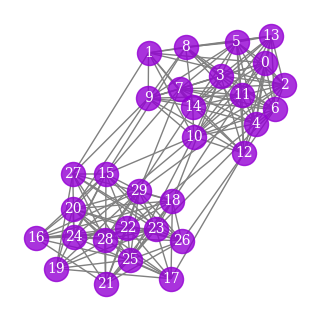

In [3]:
q=30
seed=4
cut_loc = 14
sizes = [15,15]
assert np.sum(sizes)==q, "check your input!!"
p_intra=0.8
p_inter=0.1
p_matrix = [
    [p_intra, p_inter], 
    [p_inter, p_intra], 
]
G = nx.stochastic_block_model(sizes, p_matrix, seed=seed)

edges = list(G.edges())


grouping = grouping_cascades.grouping_cascades(edges,q,cut_loc)
grouping.perform_grouping()
grouping.limit_active_qubits_per_part()

for item in grouping.edges_cascades.items():
    print(item)
print('-----')
for item in grouping.edges_cascade_lim.items():
    print(item)

count_blocks, count_remaining_blocks, count_sep = grouping.count_cuts()
print("Number of blocks + remaining separate cut gates: ", count_blocks, count_remaining_blocks)
print("Total number of separate cut gates: ", count_sep)
print("Total number of 2-qubit gates (i.e. num of edges if 1 layer QAOA): ", len(grouping.edges))

pos = nx.spring_layout(G)

plt.figure(figsize=(3, 3))
nx.draw(
    G, pos, with_labels=True, 
    node_color=(0.58, 0.0, 0.83, 0.8), edge_color='gray',
    node_size=300,  # Adjust node size to make them smaller
    font_family='serif',  # Use a serif font
    font_size=10,  # Optionally, you can adjust font size
    font_color='white'
)
#plt.savefig(f"graph_q{q}_cutloc{cut_loc}_{sizes}_pintra{p_intra}_pinter{p_inter}.pdf")


In [61]:
#generate random weights for the qaoa
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(edges))]
weights

[3.003139842829255,
 6.216360250597606,
 3.268938909424717,
 5.745956928797658,
 4.453840942926579,
 3.264635425387029,
 5.4160084537491935,
 0.8758625846036897,
 4.35677090182024,
 1.9777912437457645,
 1.7261036801583605,
 0.4778483350302407,
 5.344752851149991,
 5.927644425798397,
 5.514592057068537,
 5.048355627251486,
 3.7783176234729257,
 2.3139729942413845,
 1.0652851869920548,
 2.0644627066172485,
 5.413602247478805,
 2.9639528489047997,
 1.2691860218856965,
 2.5218660144064007,
 4.806169073341998,
 4.612580725878673,
 3.1278556869613277,
 2.6882574241832513,
 5.670631419632872,
 5.946720934085371,
 0.10287652636060418,
 2.2318101956146634,
 3.683109407178158,
 3.8335611996094796,
 6.020406961469178,
 3.0225428852750897,
 0.778434851790404,
 1.922152852559559,
 0.8840903737134781,
 4.026523657340062,
 0.03237195776493439,
 5.501644399255354,
 4.204335889328493,
 1.9727193345088554,
 2.101072700269461,
 3.2940763030122535,
 0.6844452637814611,
 5.145780223505455,
 6.1486337518726

In [4]:
#copy weights to ensure that they are not again randomly gen
weights = [4.396739984973566,
 5.4998037379028535,
 6.028001639788425,
 3.101385862729536,
 2.349543479693273,
 0.44560907966790314,
 0.7100795267413231,
 5.162874169777395,
 2.4175579499637982,
 4.521205389344508,
 2.775973660976824,
 5.304979116872369,
 4.0999475032944295,
 5.193762750435879,
 1.516560393361137,
 1.0418831278934708,
 6.26609046918643,
 5.18124988680213,
 4.032785786410801,
 0.4814004434335824,
 6.194734542522885,
 0.18885156043825552,
 0.49891942743146395,
 5.727650190237157,
 0.11081329103732158,
 5.763668703193105,
 1.1354860177710073,
 4.4984381394818715,
 2.194740271020585,
 5.6815322506738735,
 6.058271787681716,
 2.6140178510588545,
 4.382348185418359,
 2.220134246414437,
 4.465051036415081,
 1.8382548830541303,
 2.0646698910033026,
 0.9928607606233771,
 2.421340469700435,
 5.345725950553087,
 1.2576457477685659,
 5.969499840060338,
 4.517452179690945,
 5.987746917270596,
 4.342468411376709,
 5.801499334710427,
 1.6249305612707385,
 5.200457345718317,
 6.230794177725283,
 6.219025679789924,
 3.89606759119895,
 2.4317270931678716,
 6.105957752718169,
 0.9665407348758727,
 0.7323660375953875,
 3.2281278781356795,
 1.9965191137142024,
 3.7158118547633396,
 4.393961806653177,
 2.327657547718872,
 3.0277967692352425,
 2.6905657306879807,
 4.0305619034141404,
 1.4397550040254496,
 0.06415905590217882,
 5.439604474538337,
 5.917588964154815,
 2.173372549223214,
 6.146081917859582,
 0.8209964967711658,
 6.220808045403099,
 4.277230919933273,
 6.006060161955479,
 2.6486518128670653,
 3.382938712162276,
 4.778127520628939,
 2.3757981876485044,
 1.941206478089703,
 3.7795773439625004,
 4.981840350945793,
 3.366219403143876,
 5.8200971205354035,
 6.133435147252512,
 1.7994648076048596,
 3.8729221880645897,
 4.288377744870531,
 2.1867359823422765,
 4.691420639666974,
 5.541969591134206,
 5.686713252379989,
 5.591332375788028,
 5.019939870351603,
 4.37469038195764,
 1.8636655552871644,
 3.3669348151322516,
 1.936813562350768,
 3.589134583103579,
 5.139748201836684,
 0.7348308805295211,
 4.3103018049845705,
 1.7507186147050184,
 5.965137604661412,
 3.42056534570297,
 0.8170857724862671,
 3.199488074407333,
 0.8788256217859903,
 4.016687516406479,
 5.657198198578543,
 2.6944654131960983,
 2.5691202213974624,
 1.0265382599697495,
 6.20916707585689,
 0.11091451988323203,
 3.529887294882197,
 6.2204990317925555,
 2.7808977111443243,
 6.111197747200133,
 0.6937259886095747,
 1.718574137709109,
 5.606636626900246,
 3.513896049764151,
 5.994611152423061,
 1.8254548980093337,
 0.22614548914893734,
 4.311556713062551,
 1.3723804745237975,
 2.0687047835381773,
 5.658010262580309,
 3.202061428305133,
 1.3441008400570913,
 3.5820945555303823,
 1.1288069179020428,
 3.7568341332243866,
 3.754285954453184,
 3.8296393348603366,
 0.9477987340416064,
 2.290588195394672,
 6.171566575085941,
 1.5855108918745737,
 1.240603960188284,
 2.7925821333099887,
 2.211874625822342,
 4.458055422210835,
 6.170616683378023,
 4.195233977396551,
 1.3693767301584805,
 1.7147933146647614,
 6.260582837975535,
 1.1714925017620579,
 2.5008972097459434,
 6.195316284083401,
 5.219344655671749,
 0.5744116768257276,
 2.494114112202769,
 3.231768098308666,
 4.774137693652935,
 5.587685414261396,
 2.475391911921905,
 1.6400510503699948,
 4.5945443721090795,
 6.069685515428575,
 2.84252685445035,
 3.478288467151116,
 3.981051913682418,
 5.796136946445569,
 5.607631456580611,
 4.562227006399757,
 4.916379524532365,
 6.245768580763514,
 3.61247815590711,
 6.076119277932584,
 4.690418911343086]

In [5]:
angles = [1.55739, 2.32636]
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

#generate qsim files names
block_name = f"grouping_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
noblock_name = f"grouping_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"

In [6]:
grouping.create_qaoa_qsim(angles, 1, noblock_name, weights)
grouping.create_qaoa_qsim(angles, 2, block_name, weights)

Circuit written into grouping_noblock_q30_cutloc14_blockgraph_seed4_sizes_15_15_angles_155739_232636_pinter010_pintra080_weights
Circuit written into grouping_block_q30_cutloc14_blockgraph_seed4_sizes_15_15_angles_155739_232636_pinter010_pintra080_weights


In [7]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
--------Full times---------
No cut: Mean =43.17724, std=0.14887001847249026
Block: Mean =0.6180796000000001, std=0.02119766231073605
No Block: Mean =118.02239999999999, std=2.040881241032902
--------Sim times---------
No cut: Mean =42.91472, std=0.15012290165061354
Block: Mean =0.6176368, std=0.021206826772527762
No Block: Mean =118.02239999999999, std=2.040881241032902
-----Paths-----
Block: 2048
No Block: 131072
--------Ratios--------
S/J = 69.85708636881074
T/J = 190.9501624062661


### $q=30$ sizes=[15,15], $p_{inter}=0.15$

('28', [(1, 28), (2, 28), (6, 28), (7, 28), (10, 28), (13, 28)])
('6', [(6, 16), (6, 20), (6, 22), (6, 29)])
('10', [(10, 16), (10, 25), (10, 26)])
('16', [(2, 16)])
('18', [(4, 18), (5, 18), (11, 18)])
('19', [(7, 19), (8, 19), (13, 19)])
('25', [(9, 25), (12, 25)])
('1', [(1, 17)])
('17', [(5, 17)])
('2s0', [(4, 23)])
('4s0', [(14, 23)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 2), (1, 7), (1, 8), (1, 9), (1, 10), (1, 13), (1, 14), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 10), (2, 11), (2, 13), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 12), (3, 13), (3, 14), (4, 5), (4, 6), (4, 7), (4, 8), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (7, 9), (7, 11), (7, 12), (7, 14), (8, 9), (8, 11), (8, 13), (8, 14), (9, 10), (9, 11), (9, 12), (9, 14), (10, 11), (10, 12), (10, 13),

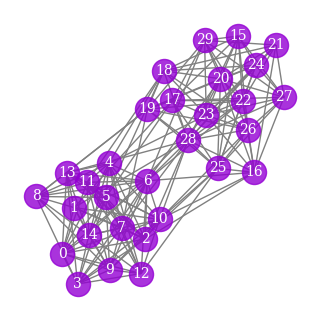

In [8]:
q=30
seed=4
cut_loc = 14
sizes = [15,15]
assert np.sum(sizes)==q, "check your input!!"
p_intra=0.8
p_inter=0.15
p_matrix = [
    [p_intra, p_inter], 
    [p_inter, p_intra], 
]
G = nx.stochastic_block_model(sizes, p_matrix, seed=seed)

edges = list(G.edges())


grouping = grouping_cascades.grouping_cascades(edges,q,cut_loc)
grouping.perform_grouping()
grouping.limit_active_qubits_per_part()

for item in grouping.edges_cascades.items():
    print(item)
print('-----')
for item in grouping.edges_cascade_lim.items():
    print(item)

count_blocks, count_remaining_blocks, count_sep = grouping.count_cuts()
print("Number of blocks + remaining separate cut gates: ", count_blocks, count_remaining_blocks)
print("Total number of separate cut gates: ", count_sep)
print("Total number of 2-qubit gates (i.e. num of edges if 1 layer QAOA): ", len(grouping.edges))

pos = nx.spring_layout(G)

plt.figure(figsize=(3, 3))
nx.draw(
    G, pos, with_labels=True, 
    node_color=(0.58, 0.0, 0.83, 0.8), edge_color='gray',
    node_size=300,  # Adjust node size to make them smaller
    font_family='serif',  # Use a serif font
    font_size=10,  # Optionally, you can adjust font size
    font_color='white'
)
#plt.savefig(f"graph_q{q}_cutloc{cut_loc}_{sizes}_pintra{p_intra}_pinter{p_inter}.pdf")


In [21]:
#generate random weights for the qaoa
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(edges))]
weights

[2.513578498106728,
 3.662715127975423,
 0.5151200956314611,
 4.896715281853725,
 4.799820133812338,
 0.9638363421027539,
 3.2325864442875707,
 5.32723769747021,
 0.6432073503416724,
 5.520610202238928,
 5.352157102829736,
 4.2914035576652,
 4.772204414142201,
 2.5784041454370903,
 5.5283153812851,
 2.294021301527879,
 4.577328012597869,
 4.546204169399878,
 0.8687218629194926,
 0.09325509376305163,
 5.508219508655429,
 2.917043006130552,
 0.7977007306442123,
 5.048168351731359,
 4.485741637403671,
 2.2871428388265986,
 1.333952286281239,
 0.6965773849472431,
 4.955912113124237,
 3.3546415777048555,
 3.9777026784047,
 6.160206068786558,
 1.1474502513832934,
 3.7072529174833098,
 1.958249258760288,
 4.908535583362138,
 5.3654420655057695,
 6.140440330318254,
 5.072628518857385,
 3.036267068069307,
 3.852475774775149,
 4.0626818648049,
 4.069702801253968,
 4.179179469863343,
 0.411390108235108,
 0.024424191522588068,
 3.491418081111558,
 5.728317552193165,
 5.4306335048291645,
 1.3004234

In [9]:
#copy weights
weights = [0.9906608736051211,
 1.4965893939525083,
 2.491965206517495,
 5.065452333778627,
 3.5438095751022494,
 3.981908213744734,
 3.132154828216025,
 1.0544875892113323,
 1.3149595606816071,
 4.529726303244889,
 6.1695556067904125,
 6.2042156733088865,
 0.24255469698155285,
 5.622433489339727,
 4.758982894953511,
 1.807825538031328,
 1.6330516997244249,
 1.392222856115106,
 6.180332662500616,
 5.42584880609824,
 3.1036385908983943,
 0.7730151151080774,
 4.586246726499974,
 0.9372504098509048,
 2.9811017305997085,
 0.7327004087051621,
 4.4048444590686255,
 5.08147715928414,
 0.9627712875975365,
 1.7550734290692178,
 4.248759682665566,
 2.020939496166772,
 2.9324287316715165,
 1.8364420581649203,
 2.4508474171758294,
 1.658322176600955,
 6.052883451282233,
 5.842710646083896,
 0.16794118271594013,
 3.071246588653754,
 4.919619906307981,
 0.8357812603548269,
 5.784734255235492,
 2.124496158066136,
 1.8322475583265707,
 5.480115608085521,
 5.488810536059265,
 5.765891616521955,
 6.2202952137737135,
 3.1215284004847494,
 0.6955646849655821,
 1.560590200707934,
 5.853367878895945,
 1.1386915616169433,
 2.3603550162751725,
 2.931689246550797,
 2.7108514719096917,
 2.4100639713007657,
 5.189129186040637,
 5.920251747521306,
 0.5573004277476926,
 3.028525415238024,
 0.13494787956680068,
 6.210034036340233,
 3.54222810627222,
 2.5119787267761255,
 4.539138452104882,
 3.7657569077967588,
 5.98594493163573,
 3.627434856280531,
 1.564308415684213,
 2.071310674683227,
 4.2141213212919055,
 5.639608257608621,
 4.013713129147102,
 4.505140214120758,
 4.378758317937399,
 3.585662901197507,
 5.7901565611632755,
 5.321349456888064,
 1.0263545310246025,
 5.989752249188531,
 3.1394389734960204,
 1.0495779920955832,
 1.2873911111988865,
 1.6896083635588717,
 0.0031793737573031404,
 0.4694584141057852,
 1.4321326401043155,
 3.0011194687384046,
 5.031135292459554,
 3.951222748077184,
 4.8095751412734264,
 3.5100821370441744,
 4.529862615968796,
 1.3452908430343096,
 5.899682187838341,
 3.155006059172427,
 1.580916592054392,
 4.046928676578572,
 4.074272279292016,
 1.5289022528261238,
 0.6565827353286784,
 3.6370843477829733,
 2.187656979113373,
 1.178342919972338,
 4.209151697819473,
 0.6410708062878852,
 3.110401691954324,
 1.5245355532496507,
 2.932762209077681,
 2.3125365013848596,
 4.4037771770240015,
 5.081836195634362,
 0.11548209411682578,
 2.1492959440536157,
 4.850695845985387,
 0.634604687005225,
 2.735214050907249,
 3.5989699313962578,
 5.033036183324374,
 5.044055238329322,
 4.902142468739355,
 1.532762310543752,
 1.5445555729884861,
 5.116445068107918,
 1.9807063507962646,
 2.597014106933487,
 2.8222013806784707,
 4.161435862453289,
 2.305285130507213,
 0.8829483745808343,
 0.22668447766616742,
 2.9489089701006357,
 1.6195357697345032,
 3.4848659838277336,
 2.063814410674261,
 1.1797885669667725,
 3.615788375778094,
 6.145897922809064,
 1.2255585225161776,
 5.909775240196903,
 6.051249502184343,
 2.01439474655021,
 5.405300947785606,
 5.757581795651409,
 2.312805998298598,
 4.091414085119841,
 0.7216664301887395,
 4.16474403351094,
 4.082715543547732,
 5.017394357560883,
 5.857074323388163,
 2.0466067759911133,
 5.933493176413327,
 5.026278559706852,
 4.786935126385578,
 5.188774845393438,
 3.3310327163946236,
 5.501067531702674,
 3.2043963863957705,
 5.800690287143512,
 4.599865237500687,
 3.0429167744866676,
 2.357327083058191,
 2.69628259965748,
 3.435079821686166,
 5.424866870655543,
 0.16096438489158613,
 2.096385757745931,
 2.065302756388683,
 2.3585787140967303,
 2.822863039965242,
 0.25619035785018685,
 1.2927234252261015,
 0.09062364349981303,
 6.185484618078897,
 1.4336092208839237,
 2.071211311098669,
 5.976699065267219,
 3.2915975555482793]

In [10]:
angles = [1.55739, 2.32636]
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

#generate qsim files names
block_name = f"grouping_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
noblock_name = f"grouping_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"

In [11]:
grouping.create_qaoa_qsim(angles, 1, noblock_name, weights)
grouping.create_qaoa_qsim(angles, 2, block_name, weights)

Circuit written into grouping_noblock_q30_cutloc14_blockgraph_seed4_sizes_15_15_angles_155739_232636_pinter015_pintra080_weights
Circuit written into grouping_block_q30_cutloc14_blockgraph_seed4_sizes_15_15_angles_155739_232636_pinter015_pintra080_weights


In [12]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =45.292199999999994, std=0.02405684933651961
Block: Mean =1.479932, std=0.054374421339449655
--------Sim times---------
No cut: Mean =45.02876, std=0.025637987440514313
Block: Mean =1.444242, std=0.05473429140858589
-----Paths-----
Block: 4096
--------Ratios--------
S/J = 30.604243978777397
T/J >= 2432.544197976664


### $q=30$, sizes=[15,15], $p_{inter}=0.17$

('24', [(2, 24), (4, 24), (8, 24), (9, 24)])
('9', [(9, 22), (9, 23), (9, 28)])
('1', [(1, 15), (1, 25), (1, 28)])
('25', [(4, 25), (11, 25)])
('28', [(5, 28)])
('4', [(4, 16)])
('5', [(5, 22), (5, 26)])
('6', [(6, 18), (6, 19), (6, 23)])
('27', [(3, 27), (12, 27)])
('16', [(7, 16)])
('22s0', [(7, 21)])
('22s1', [(11, 17)])
('22s2', [(13, 20)])
('22s3', [(14, 17)])
('18', [(12, 18)])
('23s0', [(8, 29)])
('7s0', [(13, 21)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 2), (1, 7), (1, 8), (1, 9), (1, 10), (1, 13), (1, 14), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 10), (2, 11), (2, 13), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 12), (3, 13), (3, 14), (4, 5), (4, 6), (4, 7), (4, 8), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (7, 9), (7, 11), (7, 12), (7, 14), (8, 9), (8, 11)

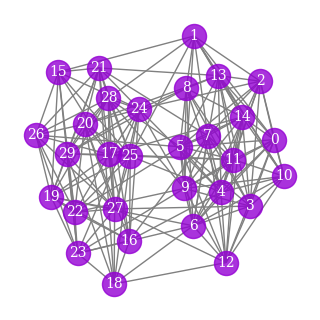

In [13]:
q=30
seed=4
cut_loc = 14
sizes = [15,15]
assert np.sum(sizes)==q, "check your input!!"
p_intra=0.8
p_inter=0.17
p_matrix = [
    [p_intra, p_inter], 
    [p_inter, p_intra], 
]
G = nx.stochastic_block_model(sizes, p_matrix, seed=seed)

edges = list(G.edges())


grouping = grouping_cascades.grouping_cascades(edges,q,cut_loc)
grouping.perform_grouping()
grouping.limit_active_qubits_per_part()

for item in grouping.edges_cascades.items():
    print(item)
print('-----')
for item in grouping.edges_cascade_lim.items():
    print(item)

count_blocks, count_remaining_blocks, count_sep = grouping.count_cuts()
print("Number of blocks + remaining separate cut gates: ", count_blocks, count_remaining_blocks)
print("Total number of separate cut gates: ", count_sep)
print("Total number of 2-qubit gates (i.e. num of edges if 1 layer QAOA): ", len(grouping.edges))

pos = nx.spring_layout(G)

plt.figure(figsize=(3, 3))
nx.draw(
    G, pos, with_labels=True, 
    node_color=(0.58, 0.0, 0.83, 0.8), edge_color='gray',
    node_size=300,  # Adjust node size to make them smaller
    font_family='serif',  # Use a serif font
    font_size=10,  # Optionally, you can adjust font size
    font_color='white'
)
#plt.savefig(f"graph_q{q}_cutloc{cut_loc}_{sizes}_pintra{p_intra}_pinter{p_inter}.pdf")


In [33]:
#generate random weights for the qaoa
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(edges))]
weights

[2.435201834718667,
 1.8014971136724187,
 5.720122716684222,
 5.115095277223413,
 1.87752949954632,
 3.6314818533830797,
 4.9504906644454,
 3.5606433643455806,
 2.4677819568653616,
 5.673880306441657,
 0.24767901299258693,
 1.0006935246458386,
 0.5947610814402366,
 0.150444303688059,
 0.5001288567974228,
 2.449343509267856,
 5.5109340149371375,
 2.44709409402056,
 2.9279858082383288,
 1.8327404997426306,
 1.5750665264294292,
 1.2502503419743984,
 5.5915034868902245,
 3.7148289903292495,
 5.667724826180213,
 0.480046945775872,
 2.5455282257741985,
 0.2511298407349902,
 1.7876422540745696,
 2.3015281648878987,
 1.3980023683620069,
 0.6451361083170423,
 0.8251963917217351,
 5.281448716297934,
 2.886558322081762,
 2.138561617935718,
 1.1327351530325578,
 5.106421400808215,
 0.27286193117219143,
 2.5121362019482234,
 1.172006572640903,
 0.4056566378596625,
 5.700540729583112,
 2.7062995119822193,
 0.8889780466924295,
 5.605395224844621,
 5.613473297132846,
 5.042951418639625,
 5.72027100477

In [14]:
#copy weights
weights = [2.435201834718667,
 1.8014971136724187,
 5.720122716684222,
 5.115095277223413,
 1.87752949954632,
 3.6314818533830797,
 4.9504906644454,
 3.5606433643455806,
 2.4677819568653616,
 5.673880306441657,
 0.24767901299258693,
 1.0006935246458386,
 0.5947610814402366,
 0.150444303688059,
 0.5001288567974228,
 2.449343509267856,
 5.5109340149371375,
 2.44709409402056,
 2.9279858082383288,
 1.8327404997426306,
 1.5750665264294292,
 1.2502503419743984,
 5.5915034868902245,
 3.7148289903292495,
 5.667724826180213,
 0.480046945775872,
 2.5455282257741985,
 0.2511298407349902,
 1.7876422540745696,
 2.3015281648878987,
 1.3980023683620069,
 0.6451361083170423,
 0.8251963917217351,
 5.281448716297934,
 2.886558322081762,
 2.138561617935718,
 1.1327351530325578,
 5.106421400808215,
 0.27286193117219143,
 2.5121362019482234,
 1.172006572640903,
 0.4056566378596625,
 5.700540729583112,
 2.7062995119822193,
 0.8889780466924295,
 5.605395224844621,
 5.613473297132846,
 5.042951418639625,
 5.720271004776212,
 3.1107558641457396,
 1.8614634410443944,
 4.513178311071534,
 0.3981809608977676,
 0.29347687565099917,
 1.964261580760675,
 2.018751412643648,
 4.317712493867325,
 6.001642093621947,
 2.1592059488194604,
 1.7288632860403084,
 2.369499640142594,
 1.6026194778698504,
 1.3217434147862182,
 4.297576630723669,
 2.3987199930951135,
 0.44974016207599316,
 3.556388839760944,
 4.828337863602147,
 0.6519645895662037,
 1.91974361302588,
 1.3243969862087357,
 5.387293883336989,
 4.5492084045016545,
 1.7363967192947494,
 0.05263514648315786,
 1.0577180482326292,
 1.7115267052111311,
 5.93547077474996,
 4.952799331625949,
 6.044332091010782,
 5.244053102702005,
 1.1594332639079759,
 3.9235965513696898,
 6.2013105276034794,
 5.4785554714650955,
 1.8716076602145035,
 1.1377578397861365,
 1.328582739971706,
 0.7145953191243838,
 4.524968454639312,
 0.8304347770189819,
 1.8537952353054297,
 0.015960045238254745,
 4.554832185978449,
 3.70338256094537,
 2.6172606392053335,
 4.068499146281362,
 4.089066667984781,
 2.9290487900957793,
 5.590388470982182,
 4.52171050150881,
 1.4797696149594153,
 4.593199343007471,
 0.6135378381915629,
 3.649392312711866,
 3.2855787455151444,
 3.727334982848456,
 1.4659172199468782,
 3.5378783149843622,
 1.6861597920660216,
 4.593378107339565,
 3.8226331351091467,
 2.2721654175686226,
 1.494625833065685,
 4.905259000045471,
 4.464669877385512,
 1.831496009387341,
 4.0886016842022,
 6.0028689436270275,
 1.3118228646375818,
 0.5537249132431499,
 0.13960372845942165,
 0.1476199836457723,
 3.620663769780957,
 1.6769578408987356,
 4.283346647143389,
 3.496366947553713,
 0.4115084009817203,
 2.3469890287864166,
 0.33852722302254573,
 1.9500541388985615,
 3.3527965717716666,
 2.9821994947274884,
 5.527486828336282,
 5.4461227404707655,
 5.571289468983952,
 2.918769351645272,
 3.5606758245255263,
 5.060240832366944,
 0.7406995347263883,
 5.038893551104694,
 0.6980651680892691,
 3.9480780369198882,
 4.387657112288028,
 1.4101327298962691,
 4.077441441470527,
 0.9364862126857267,
 3.639195741604124,
 3.1145554776214435,
 4.529065862746787,
 1.6929702712897676,
 2.182671902546065,
 6.082131265105797,
 0.5402197645907403,
 6.217044367429392,
 5.533512617928289,
 2.3360298968301154,
 3.1319429228974687,
 3.096166067926224,
 0.25347277248483097,
 5.559359077547793,
 4.424479376906215,
 3.0721382764242366,
 0.8222991169149207,
 6.033326801058091,
 1.5459395206068636,
 4.301614021348707,
 4.5843196661567704,
 1.4002562436157462,
 4.241033587951977,
 1.060845099729006,
 4.047875976466048,
 0.22341401649370476,
 1.0212021457437275,
 3.7943626527145984,
 0.780407117280623,
 0.25412609703255645,
 2.085684674543156,
 6.0856142780409765,
 1.4886551813903013,
 1.1531618281837646,
 0.13520952237901496,
 3.614409204609014,
 4.166371842119747,
 5.74081911561446]

In [15]:
angles = [1.55739, 2.32636]
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

#generate qsim files names
block_name = f"grouping_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
noblock_name = f"grouping_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"

In [16]:
grouping.create_qaoa_qsim(angles, 1, noblock_name, weights)
grouping.create_qaoa_qsim(angles, 2, block_name, weights)

Circuit written into grouping_noblock_q30_cutloc14_blockgraph_seed4_sizes_15_15_angles_155739_232636_pinter017_pintra080_weights
Circuit written into grouping_block_q30_cutloc14_blockgraph_seed4_sizes_15_15_angles_155739_232636_pinter017_pintra080_weights


In [17]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =46.27966, std=0.050624286661642044
Block: Mean =49.003159999999994, std=1.648132679853171
--------Sim times---------
No cut: Mean =46.01806, std=0.05074152540079899
Block: Mean =48.99056, std=1.6462438149921779
-----Paths-----
Block: 131072
--------Ratios--------
S/J = 0.94442195156394
T/J >= 73.46465003481408


### $q=31$ sizes=[15,16], $p_{inter}=0.1$

('23', [(7, 23), (10, 23), (14, 23)])
('9', [(9, 18), (9, 21), (9, 30)])
('30', [(11, 30), (13, 30)])
('27', [(2, 27), (8, 27)])
('15', [(3, 15), (10, 15)])
('18', [(4, 18)])
('6', [(6, 17), (6, 24)])
('7', [(7, 22)])
('21', [(11, 21)])
('10s0', [(1, 26)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 2), (1, 7), (1, 8), (1, 9), (1, 10), (1, 13), (1, 14), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 10), (2, 11), (2, 13), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 12), (3, 13), (3, 14), (4, 5), (4, 6), (4, 7), (4, 8), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (7, 9), (7, 11), (7, 12), (7, 14), (8, 9), (8, 11), (8, 13), (8, 14), (9, 10), (9, 11), (9, 12), (9, 14), (10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (12, 14), (13, 14), (15, 18), (15, 19), (15,

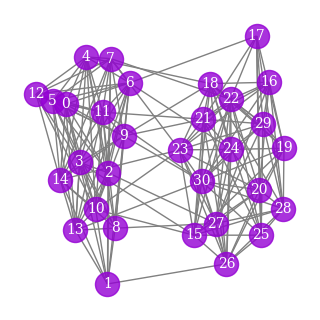

In [18]:
q=31
seed=4
cut_loc = 14
sizes = [15,16]
assert np.sum(sizes)==q, "check your input!!"
p_intra=0.8
p_inter=0.1
p_matrix = [
    [p_intra, p_inter], 
    [p_inter, p_intra], 
]
G = nx.stochastic_block_model(sizes, p_matrix, seed=seed)

edges = list(G.edges())


grouping = grouping_cascades.grouping_cascades(edges,q,cut_loc)
grouping.perform_grouping()
grouping.limit_active_qubits_per_part()

for item in grouping.edges_cascades.items():
    print(item)
print('-----')
for item in grouping.edges_cascade_lim.items():
    print(item)

count_blocks, count_remaining_blocks, count_sep = grouping.count_cuts()
print("Number of blocks + remaining separate cut gates: ", count_blocks, count_remaining_blocks)
print("Total number of separate cut gates: ", count_sep)
print("Total number of 2-qubit gates (i.e. num of edges if 1 layer QAOA): ", len(grouping.edges))

pos = nx.spring_layout(G)

plt.figure(figsize=(3, 3))
nx.draw(
    G, pos, with_labels=True, 
    node_color=(0.58, 0.0, 0.83, 0.8), edge_color='gray',
    node_size=300,  # Adjust node size to make them smaller
    font_family='serif',  # Use a serif font
    font_size=10,  # Optionally, you can adjust font size
    font_color='white'
)
#plt.savefig(f"graph_q{q}_cutloc{cut_loc}_{sizes}_pintra{p_intra}_pinter{p_inter}.pdf")


In [75]:
#generate random weights for the qaoa
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(edges))]
weights

[0.252744511506967,
 0.9499088523006173,
 3.100985799569969,
 1.7147729426233969,
 4.980213900781876,
 1.4914011034685977,
 4.3380493960185325,
 3.7769574119925693,
 2.3653909873002785,
 4.552140647950485,
 4.6429954036727885,
 3.802884160048397,
 1.4301365165843805,
 2.65650981853093,
 1.8559902204997716,
 5.184351634638335,
 2.0635915154115567,
 5.804038432146146,
 6.2214920953839,
 6.15227295845599,
 2.318284530308705,
 3.900377102420777,
 2.505878902500135,
 1.991887158112836,
 0.26204108183117913,
 5.980017686837047,
 3.112376456751633,
 2.0613802278813322,
 5.99500308568736,
 4.214464940436174,
 3.574693515415432,
 2.233948961364353,
 5.398307602483742,
 5.8755179281134335,
 5.139262470372279,
 3.6693060555010524,
 0.20118830935805407,
 3.929630572858968,
 4.818942892980242,
 4.377635268992857,
 0.6088725805689404,
 0.9200833264418075,
 3.4061072077687067,
 4.586883209866525,
 4.7757942251726355,
 2.033371496136742,
 2.527278453247909,
 2.1561218220642453,
 3.8994207313060287,
 1

In [19]:
#copy weights
weights=[0.252744511506967,
 0.9499088523006173,
 3.100985799569969,
 1.7147729426233969,
 4.980213900781876,
 1.4914011034685977,
 4.3380493960185325,
 3.7769574119925693,
 2.3653909873002785,
 4.552140647950485,
 4.6429954036727885,
 3.802884160048397,
 1.4301365165843805,
 2.65650981853093,
 1.8559902204997716,
 5.184351634638335,
 2.0635915154115567,
 5.804038432146146,
 6.2214920953839,
 6.15227295845599,
 2.318284530308705,
 3.900377102420777,
 2.505878902500135,
 1.991887158112836,
 0.26204108183117913,
 5.980017686837047,
 3.112376456751633,
 2.0613802278813322,
 5.99500308568736,
 4.214464940436174,
 3.574693515415432,
 2.233948961364353,
 5.398307602483742,
 5.8755179281134335,
 5.139262470372279,
 3.6693060555010524,
 0.20118830935805407,
 3.929630572858968,
 4.818942892980242,
 4.377635268992857,
 0.6088725805689404,
 0.9200833264418075,
 3.4061072077687067,
 4.586883209866525,
 4.7757942251726355,
 2.033371496136742,
 2.527278453247909,
 2.1561218220642453,
 3.8994207313060287,
 1.4296654674285811,
 2.297451049658352,
 2.8951996206827304,
 2.6024464921087427,
 0.12598974834563526,
 5.244100320503636,
 1.965546938048773,
 3.1844441555998357,
 5.236995635477028,
 1.1677534796067386,
 4.210736124370759,
 4.191201046709462,
 4.403752621430333,
 2.436247248345069,
 1.75230861086823,
 5.295001802384367,
 2.4103038591399955,
 1.2725921708828738,
 6.155322096030506,
 1.7693282762577816,
 2.5335701988606933,
 1.5594272085255447,
 5.8682979659655405,
 2.439849641021016,
 0.33023861642411256,
 4.333460491603355,
 4.988193082711164,
 4.21054568568936,
 0.554288336727365,
 0.8046909940181485,
 3.1882531708792516,
 6.259049650323649,
 1.792637444994189,
 3.706000425518114,
 2.1725932495613867,
 0.5590475282711826,
 0.724119077267382,
 2.348681316588232,
 5.825402795211213,
 0.20804809181192635,
 2.554274922981484,
 0.33537220582893046,
 4.633708951178069,
 0.04570600107418208,
 5.2404688102038905,
 2.597330932860147,
 3.0926022003130034,
 3.140600037866076,
 1.4486612359337157,
 3.6517081150545665,
 4.762497839650416,
 2.071644918641233,
 5.686783759127301,
 4.34707847988952,
 0.8752397704490111,
 2.099062607282831,
 2.8736319063103024,
 3.383247908419158,
 0.23975708195122417,
 1.1734378885595305,
 3.4700693974502306,
 4.862639833590299,
 5.055602082464836,
 5.244802171230136,
 4.1853915736838045,
 0.16521003841132872,
 5.281222123002069,
 4.134071299063733,
 2.3109582459636577,
 5.1800563314064805,
 1.3176280699534932,
 4.946309377639038,
 3.972421561785123,
 2.096240177166725,
 2.9398303432796964,
 1.9394166835217281,
 5.8323990825343275,
 4.272773879517382,
 3.9333393472332805,
 6.140093173374509,
 1.764019077213983,
 4.743822980715212,
 2.79264013621687,
 5.0400498871713975,
 1.32331695007842,
 0.975903946384986,
 1.8838291195811043,
 2.532554368472122,
 4.633616477081401,
 4.64968683993991,
 2.5753956984105093,
 0.7397285614598961,
 0.914278531267888,
 3.7319779661691044,
 3.8372745459655198,
 4.433472941589565,
 3.3043181175263,
 6.037869326658858,
 0.69162165117385,
 1.2736350285242686,
 1.8198207829456172,
 0.19912452203613512,
 2.6016926867663686,
 3.8628407339944606,
 2.154430692980704,
 5.463148397838062,
 2.8918482940327994,
 1.5826188628778164,
 4.13147283837549,
 5.677448064512829,
 1.839552239883119,
 2.919236931005544,
 1.3444258213506755,
 6.135148721750777,
 0.8066941758416409,
 4.550875972516368,
 3.9090712227988234,
 1.6032365701740405,
 5.870473983113958,
 2.4368140176012467,
 0.5140456693961999,
 0.3963928955759155,
 3.3906557756645967,
 2.8528200748789856,
 2.323271241758961,
 5.805009869623933,
 5.8056529102607985,
 5.969374419368364,
 6.153150848555838,
 3.7223317916517598,
 2.278581777618925,
 1.8672962250661937,
 3.43592645351609,
 6.03591466653237,
 3.443095837334722,
 2.2345493217517802,
 5.102384514717359]

In [20]:
angles = [1.55739, 2.32636]
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

#generate qsim files names
block_name = f"grouping_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
noblock_name = f"grouping_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"

In [21]:
grouping.create_qaoa_qsim(angles, 1, noblock_name, weights)
grouping.create_qaoa_qsim(angles, 2, block_name, weights)

Circuit written into grouping_noblock_q31_cutloc14_blockgraph_seed4_sizes_15_16_angles_155739_232636_pinter010_pintra080_weights
Circuit written into grouping_block_q31_cutloc14_blockgraph_seed4_sizes_15_16_angles_155739_232636_pinter010_pintra080_weights


In [22]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
--------Full times---------
No cut: Mean =91.95566, std=0.11993610965843374
Block: Mean =0.3893328, std=0.050267242969552255
No Block: Mean =308.67120000000006, std=4.551957925991854
--------Sim times---------
No cut: Mean =91.43456, std=0.12227687598233601
Block: Mean =0.3786926, std=0.04938531616827009
No Block: Mean =308.67120000000006, std=4.551957925991854
-----Paths-----
Block: 1024
No Block: 262144
--------Ratios--------
S/J = 236.18780642165262
T/J = 792.8209490697934


### $q=31$ sizes=[15,16], $p_{inter}=0.15$

('16', [(1, 16), (6, 16), (9, 16), (10, 16)])
('6', [(6, 22), (6, 23), (6, 28)])
('10', [(10, 15), (10, 18), (10, 23)])
('1', [(1, 27), (1, 30)])
('30', [(3, 30), (5, 30)])
('4', [(4, 19), (4, 28), (4, 29)])
('22', [(9, 22), (12, 22)])
('27', [(7, 27)])
('26', [(2, 26), (5, 26)])
('19', [(14, 19)])
('28s0', [(7, 21)])
('28s1', [(13, 15)])
('28s2', [(14, 20)])
('29', [(11, 29)])
('5s0', [(13, 25)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 2), (1, 7), (1, 8), (1, 9), (1, 10), (1, 13), (1, 14), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 10), (2, 11), (2, 13), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 12), (3, 13), (3, 14), (4, 5), (4, 6), (4, 7), (4, 8), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (7, 9), (7, 11), (7, 12), (7, 14), (8, 9), (8, 11), (8, 13), (8, 14), (9, 10

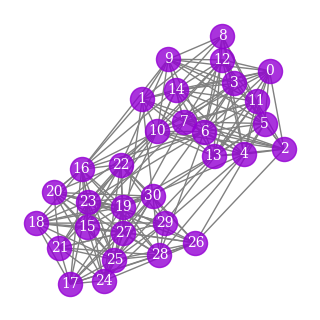

In [23]:
q=31
seed=4
cut_loc = 14
sizes = [15,16]
assert np.sum(sizes)==q, "check your input!!"
p_intra=0.8
p_inter=0.15
p_matrix = [
    [p_intra, p_inter], 
    [p_inter, p_intra], 
]
G = nx.stochastic_block_model(sizes, p_matrix, seed=seed)

edges = list(G.edges())


grouping = grouping_cascades.grouping_cascades(edges,q,cut_loc)
grouping.perform_grouping()
grouping.limit_active_qubits_per_part()

for item in grouping.edges_cascades.items():
    print(item)
print('-----')
for item in grouping.edges_cascade_lim.items():
    print(item)

count_blocks, count_remaining_blocks, count_sep = grouping.count_cuts()
print("Number of blocks + remaining separate cut gates: ", count_blocks, count_remaining_blocks)
print("Total number of separate cut gates: ", count_sep)
print("Total number of 2-qubit gates (i.e. num of edges if 1 layer QAOA): ", len(grouping.edges))

pos = nx.spring_layout(G)

plt.figure(figsize=(3, 3))
nx.draw(
    G, pos, with_labels=True, 
    node_color=(0.58, 0.0, 0.83, 0.8), edge_color='gray',
    node_size=300,  # Adjust node size to make them smaller
    font_family='serif',  # Use a serif font
    font_size=10,  # Optionally, you can adjust font size
    font_color='white'
)
#plt.savefig(f"graph_q{q}_cutloc{cut_loc}_{sizes}_pintra{p_intra}_pinter{p_inter}.pdf")

In [80]:
#generate random weights for the qaoa
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(edges))]
weights

[4.467489268478699,
 2.6891695922877106,
 4.490325477532194,
 3.666138587288222,
 2.673103339560723,
 5.207333601529211,
 4.1623845795912455,
 1.4321759980789033,
 4.538359359470497,
 1.9460822544958898,
 5.052697569486995,
 4.518995676995886,
 3.9584100274515226,
 6.219869528863877,
 4.102497466964669,
 0.5346576247979113,
 5.885002227703396,
 4.192419143311978,
 1.6969173768051178,
 0.8887774625048523,
 2.185128465551462,
 4.148355662343027,
 4.932410489620422,
 0.0032930877289876533,
 5.337331137050771,
 0.7272011924360576,
 4.660461048127072,
 4.756268410161154,
 4.20374090992567,
 4.226675391350749,
 1.6179542861932594,
 3.7175482304228,
 2.887937796953607,
 5.433314844910211,
 0.024670178843955743,
 2.537840440140339,
 0.6394794732603796,
 5.846573292800132,
 4.005333271083824,
 4.8479624921865545,
 1.8996257379050372,
 1.1005397624786155,
 1.4265832155205345,
 4.392431466160815,
 2.895194406852683,
 0.11076808145798787,
 4.066609058656853,
 2.67044145085898,
 3.945547616614343,


In [24]:
#copy weights
weights = [4.467489268478699,
 2.6891695922877106,
 4.490325477532194,
 3.666138587288222,
 2.673103339560723,
 5.207333601529211,
 4.1623845795912455,
 1.4321759980789033,
 4.538359359470497,
 1.9460822544958898,
 5.052697569486995,
 4.518995676995886,
 3.9584100274515226,
 6.219869528863877,
 4.102497466964669,
 0.5346576247979113,
 5.885002227703396,
 4.192419143311978,
 1.6969173768051178,
 0.8887774625048523,
 2.185128465551462,
 4.148355662343027,
 4.932410489620422,
 0.0032930877289876533,
 5.337331137050771,
 0.7272011924360576,
 4.660461048127072,
 4.756268410161154,
 4.20374090992567,
 4.226675391350749,
 1.6179542861932594,
 3.7175482304228,
 2.887937796953607,
 5.433314844910211,
 0.024670178843955743,
 2.537840440140339,
 0.6394794732603796,
 5.846573292800132,
 4.005333271083824,
 4.8479624921865545,
 1.8996257379050372,
 1.1005397624786155,
 1.4265832155205345,
 4.392431466160815,
 2.895194406852683,
 0.11076808145798787,
 4.066609058656853,
 2.67044145085898,
 3.945547616614343,
 5.066293432561292,
 1.1848652688988068,
 2.408285319899304,
 2.972767207197197,
 5.799220343867547,
 0.6089898286129065,
 1.6319705590837383,
 0.8955117541819402,
 2.1703436315710705,
 3.880665393516241,
 0.3392074721570904,
 2.828377800373518,
 4.289938255450936,
 2.0555699005319057,
 1.292082637995365,
 6.02241492213116,
 1.0495875761234152,
 5.365384462608651,
 6.2032506609494025,
 3.7979575401282366,
 0.5881477573659696,
 1.5195762951826222,
 3.604005199155549,
 3.6378338617620605,
 0.16476769225401794,
 0.30521277202237507,
 3.072659066013769,
 2.11698614109898,
 4.356872078063902,
 5.388172104274882,
 5.31183677009545,
 2.271195554399158,
 2.7779983022450527,
 1.8250489710281552,
 1.410055091824843,
 2.1288428713575756,
 3.5765512193370945,
 0.5820653618435522,
 0.5685163055481645,
 3.339030003113221,
 5.960900533098476,
 3.3195098794103677,
 3.6357063633592266,
 5.686508106243692,
 5.465875566657225,
 5.812996678527872,
 5.656460077971719,
 3.6630683358763707,
 5.702953637669172,
 0.9793257015563148,
 5.523623781939965,
 3.2261650371909343,
 0.25436080540824446,
 6.064722155369274,
 5.540522187552752,
 4.677349346956762,
 4.123182716180149,
 0.8759998901701013,
 4.143329493547558,
 2.702295521011007,
 2.4320057074751564,
 1.0119976660197358,
 4.404014323442132,
 0.35432315958023775,
 4.447027332815267,
 3.283289446715492,
 3.9176521521489764,
 5.906175375513528,
 1.870411178650452,
 5.4528689220668,
 3.716063735215889,
 3.8321927577074266,
 0.0666962106623236,
 2.403652882631416,
 3.3434182934293424,
 2.966079441761557,
 1.235332587984546,
 5.386958947541669,
 1.3586949806571835,
 1.152949666463223,
 0.10045427317942224,
 1.051732953156844,
 1.7967209450934734,
 6.2049042432996835,
 2.636306887163375,
 1.8131995549608038,
 3.8852517160182622,
 2.0332890485740522,
 5.4915522455564725,
 1.7256927149617864,
 5.2736160918978525,
 4.155163580427455,
 4.420125618408248,
 4.393182761506414,
 2.897940175598277,
 3.2305960265516522,
 3.313713383689422,
 0.2334601702920707,
 1.0197262076583993,
 5.460381491355299,
 5.451320322175568,
 2.8716219602742874,
 3.807384060637288,
 1.1362375843805945,
 2.5201318383087608,
 0.09755683781428488,
 5.6459248528001,
 0.4449225751843319,
 6.227017306179179,
 2.1197212946626656,
 5.640902045453637,
 5.7907412968803795,
 5.66240303628889,
 2.798602620954395,
 1.0008509197030635,
 5.814351250522456,
 5.047214207334254,
 0.17751489498172102,
 3.768736372304521,
 4.616911222525089,
 0.42138113873439087,
 4.220637205776576,
 0.27464895662618855,
 2.8649598955024294,
 0.5551737268128945,
 0.30412849341602904,
 3.521222948617284,
 4.456151609130248,
 5.701066690014308,
 4.279980343106572,
 5.408711552671466,
 2.1350500673142476,
 5.388288904367701,
 6.269131541967955,
 2.211407943072187,
 2.469556956873789,
 1.366196233711781,
 5.2103344144820705,
 1.690111618048042,
 2.2916556300810274,
 4.2075266930688,
 3.0776531090444936,
 0.7299329311701002,
 2.245822519161306,
 3.5340053587656644,
 5.63079564597538,
 1.3561557723748585,
 5.430709877466738]

In [25]:
angles = [1.55739, 2.32636]
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

#generate qsim files names
block_name = f"grouping_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
noblock_name = f"grouping_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"

In [26]:
grouping.create_qaoa_qsim(angles, 1, noblock_name, weights)
grouping.create_qaoa_qsim(angles, 2, block_name, weights)

Circuit written into grouping_noblock_q31_cutloc14_blockgraph_seed4_sizes_15_16_angles_155739_232636_pinter015_pintra080_weights
Circuit written into grouping_block_q31_cutloc14_blockgraph_seed4_sizes_15_16_angles_155739_232636_pinter015_pintra080_weights


In [27]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =97.37204, std=0.0564350812881488
Block: Mean =13.874259999999998, std=0.12179738256629341
--------Sim times---------
No cut: Mean =96.85101999999999, std=0.05572099783744022
Block: Mean =13.862639999999999, std=0.12180289980127718
-----Paths-----
Block: 32768
--------Ratios--------
S/J = 7.018178987564022
T/J >= 259.47329803535473


### $q=31$ sizes=[15,16], $p_{inter}=0.17$

('30', [(0, 30), (6, 30), (8, 30), (10, 30), (14, 30)])
('5', [(5, 17), (5, 21), (5, 23), (5, 28), (5, 29)])
('14', [(14, 19), (14, 20), (14, 24), (14, 25)])
('24', [(1, 24), (3, 24), (12, 24)])
('8', [(8, 16), (8, 21), (8, 29)])
('22', [(2, 22), (10, 22), (11, 22)])
('21', [(4, 21)])
('6', [(6, 17), (6, 25)])
('19', [(9, 19), (13, 19)])
('12', [(12, 15), (12, 23)])
('1', [(1, 27)])
('3', [(3, 28)])
('28s0', [(4, 20)])
('4s0', [(9, 15)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 2), (1, 7), (1, 8), (1, 9), (1, 10), (1, 13), (1, 14), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 10), (2, 11), (2, 13), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 12), (3, 13), (3, 14), (4, 5), (4, 6), (4, 7), (4, 8), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (7, 9), (7, 11), (7, 12), (7, 14), 

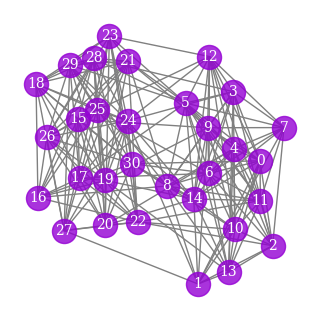

In [28]:
q=31
seed=4
cut_loc = 14
sizes = [15,16]
assert np.sum(sizes)==q, "check your input!!"
p_intra=0.8
p_inter=0.17
p_matrix = [
    [p_intra, p_inter], 
    [p_inter, p_intra], 
]
G = nx.stochastic_block_model(sizes, p_matrix, seed=seed)

edges = list(G.edges())


grouping = grouping_cascades.grouping_cascades(edges,q,cut_loc)
grouping.perform_grouping()
grouping.limit_active_qubits_per_part()

for item in grouping.edges_cascades.items():
    print(item)
print('-----')
for item in grouping.edges_cascade_lim.items():
    print(item)

count_blocks, count_remaining_blocks, count_sep = grouping.count_cuts()
print("Number of blocks + remaining separate cut gates: ", count_blocks, count_remaining_blocks)
print("Total number of separate cut gates: ", count_sep)
print("Total number of 2-qubit gates (i.e. num of edges if 1 layer QAOA): ", len(grouping.edges))

pos = nx.spring_layout(G)

plt.figure(figsize=(3, 3))
nx.draw(
    G, pos, with_labels=True, 
    node_color=(0.58, 0.0, 0.83, 0.8), edge_color='gray',
    node_size=300,  # Adjust node size to make them smaller
    font_family='serif',  # Use a serif font
    font_size=10,  # Optionally, you can adjust font size
    font_color='white'
)
#plt.savefig(f"graph_q{q}_cutloc{cut_loc}_{sizes}_pintra{p_intra}_pinter{p_inter}.pdf")


In [38]:
#generate random weights for the qaoa
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(edges))]
weights

[4.0341661112500065,
 2.618155510833129,
 0.44676714856142297,
 3.469571757888615,
 5.46808340212811,
 3.9278306644483543,
 5.403759714384167,
 4.038278068098952,
 2.981315412949293,
 5.159392843214497,
 2.564938554077825,
 6.027835515429486,
 6.185911403001367,
 0.62039536838201,
 1.4371043399323662,
 2.4121323431897777,
 3.468049071766745,
 1.4550425499095165,
 3.419605745778689,
 5.422532278863846,
 0.9587145729174364,
 4.814983684883367,
 6.202020399373011,
 5.2299619911000566,
 3.3240000105400838,
 4.4400547062717095,
 4.822130059816924,
 5.0442662689815325,
 0.89067581678658,
 2.0976204131928142,
 0.12585065922820593,
 0.7148191089045869,
 1.8376743827620434,
 5.0871861547994115,
 1.7861955654979287,
 4.149704290562956,
 4.3979711054999004,
 1.6186747507396402,
 2.25145133192916,
 0.9559238950486841,
 3.012998973143162,
 4.378028258798563,
 5.902670251318809,
 0.24647884647244744,
 0.6804641031853271,
 4.970657476395971,
 2.5844436978791694,
 1.1512078981145517,
 3.99310475447768

In [29]:
#copy weights
weights = [4.0341661112500065,
 2.618155510833129,
 0.44676714856142297,
 3.469571757888615,
 5.46808340212811,
 3.9278306644483543,
 5.403759714384167,
 4.038278068098952,
 2.981315412949293,
 5.159392843214497,
 2.564938554077825,
 6.027835515429486,
 6.185911403001367,
 0.62039536838201,
 1.4371043399323662,
 2.4121323431897777,
 3.468049071766745,
 1.4550425499095165,
 3.419605745778689,
 5.422532278863846,
 0.9587145729174364,
 4.814983684883367,
 6.202020399373011,
 5.2299619911000566,
 3.3240000105400838,
 4.4400547062717095,
 4.822130059816924,
 5.0442662689815325,
 0.89067581678658,
 2.0976204131928142,
 0.12585065922820593,
 0.7148191089045869,
 1.8376743827620434,
 5.0871861547994115,
 1.7861955654979287,
 4.149704290562956,
 4.3979711054999004,
 1.6186747507396402,
 2.25145133192916,
 0.9559238950486841,
 3.012998973143162,
 4.378028258798563,
 5.902670251318809,
 0.24647884647244744,
 0.6804641031853271,
 4.970657476395971,
 2.5844436978791694,
 1.1512078981145517,
 3.993104754477686,
 2.4463234720033955,
 5.196483469058373,
 0.5761705804661013,
 4.629351929581172,
 1.2071936080461572,
 0.9981348253666013,
 0.33883908174789407,
 3.428148612191963,
 2.3537988295038743,
 0.5329528512118552,
 4.300260405935858,
 2.1714050492248655,
 4.933227703656118,
 0.697967061275059,
 6.084056758859674,
 0.41859304718735646,
 0.504348450013843,
 3.1882113085922805,
 5.437554894428015,
 0.4733049796878682,
 1.4537171443830779,
 4.664791646951958,
 3.6816686864792016,
 5.071585182635874,
 4.25583350713042,
 5.641806875092771,
 0.02117148747752517,
 6.10670724404419,
 3.5958549102292605,
 5.261999182633717,
 0.25718152248197995,
 0.03866846416939699,
 3.5294499515937585,
 5.563763130962054,
 2.8135542027715634,
 1.506101036983819,
 1.2072807764007896,
 2.478482127545062,
 4.152373590606849,
 2.6612017364473814,
 4.603370401317446,
 5.8584082365073575,
 1.67924137001254,
 3.912224911996293,
 5.016113766837635,
 1.9831310273138136,
 0.1748230111553658,
 5.810891990298076,
 3.993723549904985,
 6.109071188118271,
 1.4420220387418068,
 3.1670624563199525,
 4.274885236484689,
 4.982944040777529,
 1.1539216942751545,
 0.4432702984320514,
 6.247125957974407,
 3.7202513687008834,
 1.9571459644289582,
 0.02103639012105273,
 2.2454543639549946,
 3.42489265132653,
 4.3219287729961975,
 2.3665979174464806,
 3.14704574517107,
 2.015134824537639,
 3.131837491785656,
 4.9288668110286675,
 5.789772662661882,
 3.965540679841974,
 1.2689483634545098,
 2.9756417334691707,
 4.408466492881432,
 0.3418402564766805,
 4.229375701948609,
 2.084104007204158,
 2.770494811780774,
 0.23563237367728362,
 1.6149217223436594,
 5.987839049706935,
 3.6063627628945247,
 5.594270441579414,
 2.7212566607932214,
 1.0695946613405867,
 0.6948659795573404,
 1.186790753334702,
 3.630494263313952,
 5.187984729515661,
 1.2981144798245015,
 3.5785996646779767,
 2.441191711949734,
 1.2606816626283035,
 1.1264473335655563,
 0.18244671914709035,
 5.81995128727084,
 4.203509318099828,
 2.4431912588810296,
 3.864943305167742,
 3.5388108482161997,
 6.186823180653016,
 3.413458230056792,
 1.8647535882158195,
 2.5862165792652454,
 3.098015129392303,
 2.948636966559059,
 5.9227066378853825,
 3.354899880621025,
 5.1901616454902735,
 0.25939852465649704,
 1.8506180476889762,
 0.21744227264084573,
 4.307406431277933,
 3.9648901926676445,
 6.114691008406939,
 4.124225608259409,
 3.7152488307868565,
 4.45436179098612,
 4.754042157209609,
 1.975887654815219,
 5.200442634831359,
 3.6992039402654666,
 1.0546943462635383,
 2.6831943176979336,
 2.8666752493526606,
 1.8406028748057714,
 1.887081686283524,
 2.135542254247487,
 5.567442502516198,
 2.6255513549245078,
 2.0767895688795934,
 0.24119100899935011,
 5.902777490181887,
 4.421678904108188,
 5.305825502061351,
 4.9313516441584895,
 2.0546741673803757,
 5.819482394696138,
 1.3695522020837805,
 0.18370726194062542,
 1.4596814685619384,
 3.9028527314115697,
 4.810931498391123,
 1.776590142835578,
 4.45308593438405,
 6.046230765299124,
 3.974362667947213,
 2.70292100429969,
 1.5851929507189726,
 0.7061851225490504,
 2.3165893163035696,
 0.9082684455972122,
 4.464852176535185,
 3.614126533959212,
 1.5410266250583895]

In [30]:
angles = [1.55739, 2.32636]
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

#generate qsim files names
block_name = f"grouping_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
noblock_name = f"grouping_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"

In [31]:
grouping.create_qaoa_qsim(angles, 1, noblock_name, weights)
grouping.create_qaoa_qsim(angles, 2, block_name, weights)

Circuit written into grouping_noblock_q31_cutloc14_blockgraph_seed4_sizes_15_16_angles_155739_232636_pinter017_pintra080_weights
Circuit written into grouping_block_q31_cutloc14_blockgraph_seed4_sizes_15_16_angles_155739_232636_pinter017_pintra080_weights


In [32]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =99.85992, std=0.051078112729429005
Block: Mean =6.670045999999999, std=0.15239726934561534
--------Sim times---------
No cut: Mean =99.33918, std=0.04956298618929132
Block: Mean =6.619648, std=0.14627165964738337
-----Paths-----
Block: 16384
--------Ratios--------
S/J = 14.971398997847993
T/J >= 539.7264126814118


### $q=32$ sizes=[16,16], $p_{inter}=0.1$


('24', [(0, 24), (2, 24), (7, 24), (11, 24)])
('13', [(13, 21), (13, 22), (13, 28), (13, 29)])
('14', [(14, 22), (14, 23), (14, 28), (14, 31)])
('4', [(4, 17), (4, 19), (4, 26)])
('22', [(8, 22)])
('21', [(9, 21), (10, 21)])
('3', [(3, 17), (3, 31)])
('17s0', [(6, 27)])
('17s1', [(15, 18)])
('31s0', [(10, 19)])
('19s0', [(15, 25)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 6), (1, 7), (1, 8), (1, 9), (1, 12), (1, 13), (1, 14), (1, 15), (2, 3), (2, 4), (2, 5), (2, 8), (2, 9), (2, 11), (2, 14), (2, 15), (3, 4), (3, 5), (3, 6), (3, 7), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 7), (6, 10), (6, 12), (6, 13), (6, 15), (7, 8), (7, 10), (7, 12), (7, 13), (7, 14), (7, 15), (8, 9), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15),

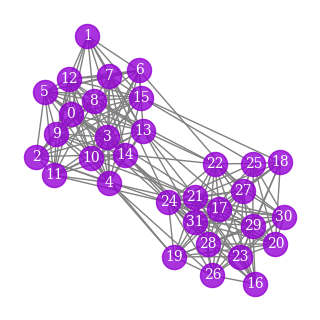

In [33]:
q=32
seed=4
cut_loc = 15
sizes = [16,16]
assert np.sum(sizes)==q, "check your input!!"
p_intra=0.8
p_inter=0.1
p_matrix = [
    [p_intra, p_inter], 
    [p_inter, p_intra], 
]
G = nx.stochastic_block_model(sizes, p_matrix, seed=seed)

edges = list(G.edges())


grouping = grouping_cascades.grouping_cascades(edges,q,cut_loc)
grouping.perform_grouping()
grouping.limit_active_qubits_per_part()

for item in grouping.edges_cascades.items():
    print(item)
print('-----')
for item in grouping.edges_cascade_lim.items():
    print(item)

count_blocks, count_remaining_blocks, count_sep = grouping.count_cuts()
print("Number of blocks + remaining separate cut gates: ", count_blocks, count_remaining_blocks)
print("Total number of separate cut gates: ", count_sep)
print("Total number of 2-qubit gates (i.e. num of edges if 1 layer QAOA): ", len(grouping.edges))

pos = nx.spring_layout(G)

plt.figure(figsize=(3, 3))
nx.draw(
    G, pos, with_labels=True, 
    node_color=(0.58, 0.0, 0.83, 0.8), edge_color='gray',
    node_size=300,  # Adjust node size to make them smaller
    font_family='serif',  # Use a serif font
    font_size=10,  # Optionally, you can adjust font size
    font_color='white'
)
#plt.savefig(f"graph_q{q}_cutloc{cut_loc}_{sizes}_pintra{p_intra}_pinter{p_inter}.pdf")

In [86]:
#generate random weights for the qaoa
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(edges))]
weights

[5.486992961064379,
 6.0688583565620835,
 5.368754253284226,
 4.314327512927416,
 5.342402572130726,
 3.7051286759087025,
 4.414752585383159,
 5.860587323741387,
 2.998738185001383,
 2.1787989010851065,
 5.721346593286474,
 3.4913290109048694,
 2.953830804483882,
 0.07020405201372916,
 1.9404271863534204,
 1.43948215674003,
 0.38288455576828384,
 6.091901332094837,
 2.704372496176128,
 1.46080464947632,
 0.5782326633256218,
 4.872128125472958,
 4.266294338103237,
 2.4643255770180708,
 2.384448205129316,
 2.5774927272905086,
 2.0426758434591497,
 5.988782897562398,
 3.1466335450592156,
 0.28363763725160174,
 5.2386095743757215,
 4.414664645917458,
 4.970798191200694,
 0.8630566228708559,
 4.961820388770828,
 3.2942187848193845,
 5.320794978252248,
 0.6942127685624216,
 4.884018691047139,
 5.8279344090508065,
 0.555006685098902,
 0.31950148015525104,
 3.7950836558493872,
 0.7300574140564867,
 3.4877374570765887,
 3.765692732309259,
 1.4954816245119513,
 2.4299091064478353,
 3.94372794418

In [34]:
#copy weights
weights = [5.486992961064379,
 6.0688583565620835,
 5.368754253284226,
 4.314327512927416,
 5.342402572130726,
 3.7051286759087025,
 4.414752585383159,
 5.860587323741387,
 2.998738185001383,
 2.1787989010851065,
 5.721346593286474,
 3.4913290109048694,
 2.953830804483882,
 0.07020405201372916,
 1.9404271863534204,
 1.43948215674003,
 0.38288455576828384,
 6.091901332094837,
 2.704372496176128,
 1.46080464947632,
 0.5782326633256218,
 4.872128125472958,
 4.266294338103237,
 2.4643255770180708,
 2.384448205129316,
 2.5774927272905086,
 2.0426758434591497,
 5.988782897562398,
 3.1466335450592156,
 0.28363763725160174,
 5.2386095743757215,
 4.414664645917458,
 4.970798191200694,
 0.8630566228708559,
 4.961820388770828,
 3.2942187848193845,
 5.320794978252248,
 0.6942127685624216,
 4.884018691047139,
 5.8279344090508065,
 0.555006685098902,
 0.31950148015525104,
 3.7950836558493872,
 0.7300574140564867,
 3.4877374570765887,
 3.765692732309259,
 1.4954816245119513,
 2.4299091064478353,
 3.9437279441841966,
 5.910877272764902,
 2.949514901348523,
 1.5141724719344565,
 0.1952925535709952,
 4.027983087794917,
 0.9049769706115339,
 2.3080648276977045,
 5.754885892719812,
 4.839109699945617,
 2.2197458666265013,
 1.9086765695477914,
 3.278574001126688,
 4.450370098088941,
 4.5408172475129325,
 3.094526973439479,
 2.9125122020438052,
 3.957698708632127,
 0.2723029538884267,
 0.9243023362444918,
 6.05867181665299,
 1.3958438114401834,
 3.88163759251918,
 0.3882565449244372,
 4.999850250852391,
 2.954674382125971,
 4.187348229609219,
 5.718194329712546,
 1.5079094398332398,
 3.957607126852297,
 1.8088152199002043,
 3.3270872983631796,
 0.5751052617931761,
 6.218189860444635,
 1.5281639347426306,
 5.335890700268471,
 3.164157525073281,
 0.9063760794838827,
 3.625780748206823,
 5.1254795445914905,
 5.022807719257518,
 3.914883940905069,
 2.8203352645946604,
 1.0062912720507236,
 4.549552596373853,
 2.6644729781359295,
 3.2344284194988435,
 5.232598985191946,
 3.8570215615878096,
 5.180047501160008,
 4.8849182265077875,
 1.1361912322192516,
 3.56861880200521,
 5.781686201710834,
 6.044336871591882,
 0.6905567563122473,
 4.567278616078243,
 4.702747410138346,
 5.1339670712181205,
 4.107889322506163,
 4.105813234947168,
 3.5653061797106544,
 4.014451497948633,
 0.5157682775772555,
 3.1735079921302725,
 2.9815867399988027,
 4.206442073141437,
 5.264362141368399,
 2.1673166109416506,
 0.4768758200551586,
 0.8211569242466665,
 3.8020436169767726,
 4.018413765170725,
 2.8571621142727457,
 3.3959789395348263,
 1.9672076575402384,
 1.3563969250636942,
 0.17272050258877983,
 0.5596682716326805,
 3.3472582295798037,
 6.098435092233139,
 1.229176519610369,
 3.6383607816288923,
 5.150874208197894,
 1.0449718335474276,
 4.467580013200342,
 3.4797516264877184,
 4.020076181720093,
 5.215635714006085,
 2.240269440138646,
 4.487196287306581,
 1.6587596459513578,
 3.49568444415428,
 2.28399572945683,
 3.6315603337444453,
 6.115179740237951,
 0.020107738814328223,
 3.815786535081938,
 3.776928222653275,
 4.724960988435531,
 1.9563882878202807,
 5.904683319399973,
 4.080600184093438,
 1.7040006015935774,
 3.4036648924878308,
 0.3151837850082897,
 4.86659545725106,
 1.1387629456413804,
 2.7860309373330505,
 6.0035155480672815,
 5.316641215425369,
 0.5160359948809015,
 0.11414112003101096,
 4.462955451592242,
 1.2901905877234532,
 2.1298911448265447,
 3.001262973828638,
 4.126208937796293,
 2.3491654658318866,
 0.6337013461237279,
 0.012752414767636784,
 2.504940531028689,
 6.2420412003539205,
 5.756001940211477,
 1.8067990043133233,
 4.256110724769477,
 3.5473774457721796,
 1.4383011488430488,
 1.7835886957154046,
 2.758338463721942,
 3.6703036776756512,
 3.5331202150499474,
 6.106399234064242,
 3.799876127481602,
 4.724758097427996,
 2.344246934295369,
 2.601871594340709,
 4.1876139852523195,
 1.6675387595225506,
 5.99315173025754,
 3.652571423680682,
 5.260644175258585,
 5.465187328491955,
 1.7627734799496486,
 6.082998674652795,
 2.8203663197306224,
 1.2514667094547818,
 1.6389691507520876,
 5.235176171433178,
 4.063125900788975,
 6.158738373730726,
 4.770324562347162,
 2.697988726699249,
 6.160712831597241,
 1.5292990802098414,
 0.35932696116388796,
 3.8834227991664307,
 0.7450570122898756]

In [35]:
angles = [1.55739, 2.32636]
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

#generate qsim files names
block_name = f"grouping_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
noblock_name = f"grouping_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"

In [36]:
grouping.create_qaoa_qsim(angles, 1, noblock_name, weights)
grouping.create_qaoa_qsim(angles, 2, block_name, weights)

Circuit written into grouping_noblock_q32_cutloc15_blockgraph_seed4_sizes_16_16_angles_155739_232636_pinter010_pintra080_weights
Circuit written into grouping_block_q32_cutloc15_blockgraph_seed4_sizes_16_16_angles_155739_232636_pinter010_pintra080_weights


In [37]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =201.4944, std=0.0394796149930558
Block: Mean =0.847711, std=0.011540626655429083
--------Sim times---------
No cut: Mean =200.457, std=0.0407774447458323
Block: Mean =0.8218384000000001, std=0.004971240754580308
-----Paths-----
Block: 2048
--------Ratios--------
S/J = 237.69232674814884
T/J >= 4246.730312571148


### $q=32$ sizes=[16,16], $p_{inter}=0.11$

('23', [(0, 23), (8, 23), (10, 23), (12, 23), (15, 23)])
('13', [(13, 16), (13, 17), (13, 21), (13, 24), (13, 27)])
('12', [(12, 17), (12, 18), (12, 24)])
('28', [(2, 28), (3, 28), (6, 28)])
('3', [(3, 24), (3, 26)])
('24s0', [(2, 20)])
('24s1', [(6, 16)])
('24s2', [(9, 20)])
('24s3', [(14, 18)])
('18', [(4, 18)])
('2s0', [(7, 25)])
('20s0', [(9, 22)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 6), (1, 7), (1, 8), (1, 9), (1, 12), (1, 13), (1, 14), (1, 15), (2, 3), (2, 4), (2, 5), (2, 8), (2, 9), (2, 11), (2, 14), (2, 15), (3, 4), (3, 5), (3, 6), (3, 7), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 7), (6, 10), (6, 12), (6, 13), (6, 15), (7, 8), (7, 10), (7, 12), (7, 13), (7, 14), (7, 15), (8, 9), (8, 11), (8, 12), (8, 1

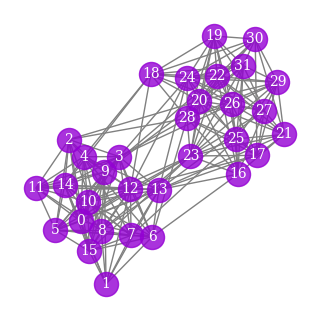

In [38]:
q=32
seed=4
cut_loc = 15
sizes = [16,16]
assert np.sum(sizes)==q, "check your input!!"
p_intra=0.8
p_inter=0.11
p_matrix = [
    [p_intra, p_inter], 
    [p_inter, p_intra], 
]
G = nx.stochastic_block_model(sizes, p_matrix, seed=seed)

edges = list(G.edges())


grouping = grouping_cascades.grouping_cascades(edges,q,cut_loc)
grouping.perform_grouping()
grouping.limit_active_qubits_per_part()

for item in grouping.edges_cascades.items():
    print(item)
print('-----')
for item in grouping.edges_cascade_lim.items():
    print(item)

count_blocks, count_remaining_blocks, count_sep = grouping.count_cuts()
print("Number of blocks + remaining separate cut gates: ", count_blocks, count_remaining_blocks)
print("Total number of separate cut gates: ", count_sep)
print("Total number of 2-qubit gates (i.e. num of edges if 1 layer QAOA): ", len(grouping.edges))

pos = nx.spring_layout(G)

plt.figure(figsize=(3, 3))
nx.draw(
    G, pos, with_labels=True, 
    node_color=(0.58, 0.0, 0.83, 0.8), edge_color='gray',
    node_size=300,  # Adjust node size to make them smaller
    font_family='serif',  # Use a serif font
    font_size=10,  # Optionally, you can adjust font size
    font_color='white'
)
#plt.savefig(f"graph_q{q}_cutloc{cut_loc}_{sizes}_pintra{p_intra}_pinter{p_inter}.pdf")

In [94]:
#generate random weights for the qaoa
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(edges))]
weights

[0.9621635999457122,
 2.801767496816569,
 0.8607067149847022,
 1.0008042406423587,
 1.8182365032530114,
 4.258325609694232,
 4.661054269372721,
 0.5382399054094751,
 1.105957205808492,
 3.2206167183253713,
 0.2721313675821309,
 3.6083820558885193,
 5.010872896525005,
 1.720968890768015,
 0.9702901693832849,
 2.8617034770670697,
 1.853263334336368,
 4.6953516230680306,
 5.938459376336988,
 1.9595368926989123,
 5.612343088340162,
 5.448887579567006,
 3.4654516454911124,
 4.3195338763605475,
 2.30029634975409,
 1.2706505556493568,
 1.9828451700847918,
 0.20098442890388976,
 5.202453737463563,
 0.0678204312003181,
 4.539288301578323,
 3.3538010831264926,
 1.6612532988816322,
 4.869821912526702,
 2.8806262613328264,
 3.036662405315217,
 0.9281881503725246,
 1.752878928349729,
 1.7054539915237734,
 1.6453572397968292,
 2.9891454611102284,
 1.4822005753192808,
 5.283984653935013,
 0.5329594856716432,
 4.419504965071632,
 1.0062349607825718,
 4.841435573485249,
 1.926432178405065,
 3.384892174

In [39]:
#copy weights
weights =[0.9621635999457122,
 2.801767496816569,
 0.8607067149847022,
 1.0008042406423587,
 1.8182365032530114,
 4.258325609694232,
 4.661054269372721,
 0.5382399054094751,
 1.105957205808492,
 3.2206167183253713,
 0.2721313675821309,
 3.6083820558885193,
 5.010872896525005,
 1.720968890768015,
 0.9702901693832849,
 2.8617034770670697,
 1.853263334336368,
 4.6953516230680306,
 5.938459376336988,
 1.9595368926989123,
 5.612343088340162,
 5.448887579567006,
 3.4654516454911124,
 4.3195338763605475,
 2.30029634975409,
 1.2706505556493568,
 1.9828451700847918,
 0.20098442890388976,
 5.202453737463563,
 0.0678204312003181,
 4.539288301578323,
 3.3538010831264926,
 1.6612532988816322,
 4.869821912526702,
 2.8806262613328264,
 3.036662405315217,
 0.9281881503725246,
 1.752878928349729,
 1.7054539915237734,
 1.6453572397968292,
 2.9891454611102284,
 1.4822005753192808,
 5.283984653935013,
 0.5329594856716432,
 4.419504965071632,
 1.0062349607825718,
 4.841435573485249,
 1.926432178405065,
 3.3848921749252514,
 5.477453199424538,
 4.432701162313146,
 2.2956474828770435,
 5.5573586560982795,
 3.0005794300132713,
 1.8428863980823873,
 0.4544954115132171,
 2.5248722018002603,
 3.699301176485259,
 0.4219349989249823,
 3.216416019032589,
 0.04321914207512138,
 0.5479799790196087,
 0.8711469369505501,
 2.611224133860274,
 3.48183921457165,
 6.155430429759303,
 0.39089745795225084,
 0.5814393243314472,
 3.789073499528689,
 1.702029852692793,
 1.3544404684499673,
 1.311561962471642,
 3.0820911017065677,
 1.3322443588714084,
 6.1605609321185515,
 5.231366403777043,
 3.5011111929362513,
 3.90249680479106,
 1.1140850877593398,
 4.815460716769916,
 4.17211182254867,
 4.190680203728429,
 2.8580198039326667,
 2.806758781284468,
 4.389132430538319,
 4.456137788065068,
 5.033851846969481,
 3.644548960244311,
 4.510288635092688,
 5.829051346220349,
 3.7552673660195004,
 5.886871307424502,
 1.0329513988735977,
 0.11807013777784361,
 4.511543888932863,
 0.9385656160819781,
 2.3047594186619222,
 2.707651359775053,
 4.086953703672895,
 5.015380285503051,
 6.277159196261261,
 2.2217480750201526,
 5.410988038876014,
 5.965316173864828,
 3.6046436482192505,
 0.4573802949565963,
 2.9281467145394844,
 0.5740453113936008,
 2.7287531113309487,
 1.3091213804466224,
 4.314851701198388,
 4.3704172777223675,
 1.981569213490702,
 2.503590701669706,
 0.04042873277329819,
 4.337086613813135,
 0.8035206995797439,
 4.82911892465442,
 1.1698780204273713,
 3.225169084632525,
 1.2564283327453782,
 6.244926572640492,
 5.538113279202459,
 1.3379244384475026,
 5.07463874824264,
 3.2356151742601598,
 2.7060412269079444,
 0.5460139530387594,
 4.354599793823491,
 4.393610953387346,
 2.1573622133185806,
 1.3264558155363344,
 3.8439160163266655,
 0.6792206819185787,
 4.206439204971736,
 0.6535604055517581,
 1.7445561319322553,
 0.7767524885938615,
 0.9162978580339604,
 3.2106297425092762,
 3.408329803099656,
 0.41843894156355116,
 4.8394540999942475,
 2.0053229331605773,
 1.3340178466369563,
 0.31344797907505334,
 4.791642749121757,
 3.786229227290866,
 2.1884905621349544,
 5.769506453374662,
 4.384315941632441,
 5.843590754656157,
 4.327679655075292,
 4.746994980582072,
 1.0196228100131093,
 5.884286326358531,
 0.09618582968945537,
 5.6969587116287475,
 3.778436046666393,
 2.838903291794476,
 2.764462700584635,
 5.935509102784604,
 1.4249480394886151,
 4.156851643550482,
 0.4294188434754899,
 1.3285895895819417,
 1.0632117555549216,
 4.635268773733327,
 0.5157446523406675,
 1.11167466019483,
 5.110957818024723,
 4.592711619617053,
 5.975204100845695,
 1.4359295840025186,
 4.4494528115415175,
 1.6959926842157305,
 2.4066405610462014,
 2.5407801540222352,
 0.03473779843858017,
 2.728256653222821,
 4.9343891874021955,
 5.759248870178478,
 0.25979633069703556,
 5.452460331052615,
 1.3343315259813537,
 1.2718405165863675,
 0.4886403270258771,
 4.147622368497089,
 0.2658626351590381,
 2.102148232141349,
 4.896266800597644,
 5.295860431300684,
 6.040955713983329,
 3.2797764675981087,
 1.977481313451121,
 0.3507260115137521,
 2.267734129737668,
 0.8130755726027129,
 5.047891724602271,
 4.994128597020786,
 6.0647195857985645,
 0.348593292584824,
 5.546652806830945,
 2.444502939289617,
 4.248696415256732,
 6.032897513759638,
 0.05568816462538001]

In [40]:
angles = [1.55739, 2.32636]
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

#generate qsim files names
block_name = f"grouping_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
noblock_name = f"grouping_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"

In [41]:
grouping.create_qaoa_qsim(angles, 1, noblock_name, weights)
grouping.create_qaoa_qsim(angles, 2, block_name, weights)

Circuit written into grouping_noblock_q32_cutloc15_blockgraph_seed4_sizes_16_16_angles_155739_232636_pinter011_pintra080_weights
Circuit written into grouping_block_q32_cutloc15_blockgraph_seed4_sizes_16_16_angles_155739_232636_pinter011_pintra080_weights


In [42]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =202.76860000000002, std=0.059724701757312475
Block: Mean =1.6047440000000002, std=0.008143698422706971
--------Sim times---------
No cut: Mean =201.72779999999997, std=0.06286938841756963
Block: Mean =1.56446, std=0.007417417340287604
-----Paths-----
Block: 4096
--------Ratios--------
S/J = 126.35573025977975
T/J >= 2243.3484717811684


### $q=32$ sizes=[16,16], $p_{inter}=0.12$

('23', [(2, 23), (5, 23), (8, 23), (11, 23), (12, 23)])
('12', [(12, 16), (12, 17), (12, 21), (12, 26)])
('15', [(15, 16), (15, 18), (15, 19), (15, 20), (15, 29)])
('16', [(2, 16), (13, 16)])
('3', [(3, 18), (3, 19), (3, 21), (3, 27)])
('18', [(6, 18), (11, 18)])
('11', [(11, 17), (11, 24)])
('19', [(14, 19)])
('2s0', [(0, 22)])
('2s1', [(7, 27)])
('2s2', [(9, 25)])
('21s0', [(6, 30)])
('27s0', [(8, 25)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 6), (1, 7), (1, 8), (1, 9), (1, 12), (1, 13), (1, 14), (1, 15), (2, 3), (2, 4), (2, 5), (2, 8), (2, 9), (2, 11), (2, 14), (2, 15), (3, 4), (3, 5), (3, 6), (3, 7), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 7), (6, 10), (6, 12), (6, 13), (6, 15), (7, 8), (7, 10), (7, 12), (7, 

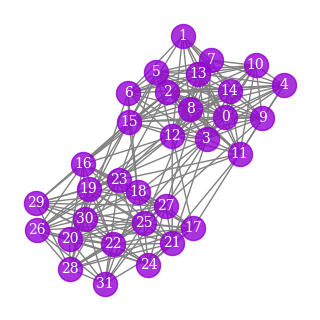

In [43]:
q=32
seed=4
cut_loc = 15
sizes = [16,16]
assert np.sum(sizes)==q, "check your input!!"
p_intra=0.8
p_inter=0.12
p_matrix = [
    [p_intra, p_inter], 
    [p_inter, p_intra], 
]
G = nx.stochastic_block_model(sizes, p_matrix, seed=seed)

edges = list(G.edges())


grouping = grouping_cascades.grouping_cascades(edges,q,cut_loc)
grouping.perform_grouping()
grouping.limit_active_qubits_per_part()

for item in grouping.edges_cascades.items():
    print(item)
print('-----')
for item in grouping.edges_cascade_lim.items():
    print(item)

count_blocks, count_remaining_blocks, count_sep = grouping.count_cuts()
print("Number of blocks + remaining separate cut gates: ", count_blocks, count_remaining_blocks)
print("Total number of separate cut gates: ", count_sep)
print("Total number of 2-qubit gates (i.e. num of edges if 1 layer QAOA): ", len(grouping.edges))

pos = nx.spring_layout(G)

plt.figure(figsize=(3, 3))
nx.draw(
    G, pos, with_labels=True, 
    node_color=(0.58, 0.0, 0.83, 0.8), edge_color='gray',
    node_size=300,  # Adjust node size to make them smaller
    font_family='serif',  # Use a serif font
    font_size=10,  # Optionally, you can adjust font size
    font_color='white'
)
#plt.savefig(f"graph_q{q}_cutloc{cut_loc}_{sizes}_pintra{p_intra}_pinter{p_inter}.pdf")

In [47]:
#generate random weights for the qaoa
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(edges))]
weights

[4.405161738127536,
 1.624124963717763,
 4.451191710419454,
 6.246472224184871,
 5.582705354373607,
 4.140228597704197,
 3.740405339525707,
 4.840320170415289,
 5.4311723586047576,
 1.755128386567533,
 1.592831226154949,
 2.5090842121166923,
 3.823360721943941,
 2.268066140069033,
 3.199841708724804,
 6.241461992137086,
 1.6358308517772793,
 1.9723544885406197,
 3.9234761987476143,
 6.232868838641312,
 4.973007380571863,
 4.287530166238754,
 0.8195824492302773,
 3.9267238785038407,
 0.877303401071243,
 0.12097403655802356,
 4.490321146500053,
 4.7776814881647685,
 5.628318621454462,
 5.213812494988406,
 1.5919674108999116,
 1.2139407419485966,
 2.8538465603955294,
 4.989292750469156,
 5.884368458724487,
 6.082176080015496,
 2.15258378590277,
 6.036167711837849,
 3.6948689468087306,
 0.6664700201301602,
 3.078058393410075,
 0.800050995721051,
 0.4124847012132996,
 4.383840140776,
 0.8758994634058297,
 4.917859411854599,
 4.050385436008346,
 1.9185641457265408,
 2.2076684762565533,
 0.50

In [44]:
#copy weights
weights = [4.405161738127536,
 1.624124963717763,
 4.451191710419454,
 6.246472224184871,
 5.582705354373607,
 4.140228597704197,
 3.740405339525707,
 4.840320170415289,
 5.4311723586047576,
 1.755128386567533,
 1.592831226154949,
 2.5090842121166923,
 3.823360721943941,
 2.268066140069033,
 3.199841708724804,
 6.241461992137086,
 1.6358308517772793,
 1.9723544885406197,
 3.9234761987476143,
 6.232868838641312,
 4.973007380571863,
 4.287530166238754,
 0.8195824492302773,
 3.9267238785038407,
 0.877303401071243,
 0.12097403655802356,
 4.490321146500053,
 4.7776814881647685,
 5.628318621454462,
 5.213812494988406,
 1.5919674108999116,
 1.2139407419485966,
 2.8538465603955294,
 4.989292750469156,
 5.884368458724487,
 6.082176080015496,
 2.15258378590277,
 6.036167711837849,
 3.6948689468087306,
 0.6664700201301602,
 3.078058393410075,
 0.800050995721051,
 0.4124847012132996,
 4.383840140776,
 0.8758994634058297,
 4.917859411854599,
 4.050385436008346,
 1.9185641457265408,
 2.2076684762565533,
 0.5054355627480486,
 2.8324775461868192,
 5.817328867862787,
 0.11433165350388229,
 0.16246578262026018,
 1.2415350139460908,
 0.2527808603979108,
 2.7669725170024186,
 3.066802329804383,
 5.674096836086979,
 2.7796649887466462,
 1.8924585190109977,
 0.03489968437030511,
 0.3397612225254483,
 2.14828965084052,
 2.105146412560041,
 4.717365687656414,
 0.7501024891929684,
 4.969259837730477,
 4.308109713974647,
 3.483754380434628,
 2.7266232013179468,
 1.4126041054600504,
 6.02126727264026,
 4.199328027992039,
 3.013641852142646,
 2.4656143838927296,
 1.2542466164230812,
 3.8571482047967574,
 0.808156995692136,
 4.584942591581971,
 0.19964564148539446,
 2.7727722666692785,
 4.196363680429226,
 4.992532443135308,
 6.172667333714437,
 2.6994862426881694,
 5.01938538803441,
 0.5444617773023736,
 0.45192158671403454,
 3.8611125900054706,
 0.20768171967610305,
 6.114139801851375,
 0.9318671979692477,
 0.755326057595927,
 3.4325056321801566,
 0.8826823820772525,
 2.0322648663144327,
 1.6252758784281738,
 0.7381540334086296,
 4.435902905713358,
 0.8523260318387258,
 5.820119120038352,
 1.7457215094156535,
 5.372461169872372,
 3.2360249819948574,
 0.22007155707276038,
 4.473981087095452,
 4.611549493451061,
 0.0005841978851145646,
 2.9029683773754607,
 2.7478001699841115,
 0.6287655282995178,
 3.4760490714208956,
 3.4955604278569625,
 2.4027085644997483,
 0.9807687913550912,
 2.9164927683919477,
 0.8661227933287436,
 4.384878192165533,
 2.9069931835628458,
 5.072056532923387,
 0.1087986879243421,
 2.6182385204319836,
 4.882106069073645,
 4.284130022785865,
 2.3702145844841516,
 5.3488332540944175,
 3.2521790527597645,
 0.8783161316620243,
 3.502189534193333,
 1.9793383330418302,
 4.672179878386501,
 3.831161105593783,
 3.5844450540908768,
 0.3619626518925243,
 5.24277029773653,
 4.873062941421793,
 6.211505132332845,
 4.811386788860015,
 3.0479134534595325,
 1.956723687262793,
 2.994380278945296,
 4.9691869413794985,
 4.45403850231856,
 0.7150649368568951,
 5.321508377358077,
 2.3370069370174957,
 0.8643556877766158,
 0.41568569315682496,
 4.783003641844464,
 4.934113421614325,
 2.5357114489138675,
 5.165027936136794,
 2.374783415235958,
 5.058513862732029,
 6.1604984874592885,
 0.13177981658490084,
 2.336598047191661,
 3.163661367451874,
 0.03777150954951666,
 6.041370596067416,
 2.791177792796497,
 4.709459296241403,
 3.1844726728401076,
 1.3695305615150077,
 2.464557244816909,
 5.014500409504496,
 3.2217545046292395,
 6.227523167882335,
 1.892369155882074,
 5.478764178270977,
 4.960063120243403,
 3.4669059586849156,
 0.34778341610501906,
 5.681321328441429,
 2.1042106641622262,
 0.06725123397501472,
 1.097339003576193,
 1.1813321592194457,
 2.1712816193375297,
 0.2892154590431861,
 1.929465972984317,
 4.99589477464811,
 4.2026632438836105,
 5.088350231724213,
 5.687224757143229,
 2.3154842391167874,
 5.371421211641152,
 2.4790332532850727,
 1.3770278698383667,
 3.0473069498968632,
 2.7955146303892167,
 1.515654180824149,
 1.6371668187059503,
 2.6063821170370276,
 0.9733515806184655,
 1.537484245862638,
 1.265738918705203,
 4.533585303219909,
 2.1945544068893903,
 2.563525342465454,
 0.17204731781249863,
 3.2777780456915755,
 3.2824115196487536,
 2.561682714412393,
 3.5458995539849627,
 4.872246027875945,
 5.957430049934016,
 2.6334775788797806,
 0.860860167636734,
 3.4004261212404594,
 5.538731222486676,
 5.0830192922238515,
 2.2491242238357]

In [45]:
angles = [1.55739, 2.32636]
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

#generate qsim files names
block_name = f"grouping_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
noblock_name = f"grouping_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"

In [46]:
grouping.create_qaoa_qsim(angles, 1, noblock_name, weights)
grouping.create_qaoa_qsim(angles, 2, block_name, weights)

Circuit written into grouping_noblock_q32_cutloc15_blockgraph_seed4_sizes_16_16_angles_155739_232636_pinter012_pintra080_weights
Circuit written into grouping_block_q32_cutloc15_blockgraph_seed4_sizes_16_16_angles_155739_232636_pinter012_pintra080_weights


In [47]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =209.71419999999998, std=0.04173439828247703
Block: Mean =3.2191019999999995, std=0.03649604658041744
--------Sim times---------
No cut: Mean =208.67600000000002, std=0.042156849977198096
Block: Mean =3.165348, std=0.03689476353088605
-----Paths-----
Block: 8192
--------Ratios--------
S/J = 65.14680180994576
T/J >= 1118.324302864588


### $q=33$ sizes=[16,17], $p_{inter}=0.1$

('13', [(13, 32), (13, 24), (13, 25), (13, 30)])
('30', [(2, 30), (7, 30)])
('3', [(3, 27), (3, 29), (3, 31)])
('25', [(9, 25), (12, 25)])
('12', [(12, 24), (12, 31)])
('14', [(14, 16), (14, 19), (14, 26)])
('2', [(2, 21)])
('21', [(4, 21)])
('27', [(9, 27)])
('29', [(10, 29)])
('31s0', [(0, 23)])
('31s1', [(7, 16)])
('7s0', [(6, 20)])
('16s0', [(8, 28)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 6), (1, 7), (1, 8), (1, 9), (1, 12), (1, 13), (1, 14), (1, 15), (2, 3), (2, 4), (2, 5), (2, 8), (2, 9), (2, 11), (2, 14), (2, 15), (3, 4), (3, 5), (3, 6), (3, 7), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 7), (6, 10), (6, 12), (6, 13), (6, 15), (7, 8), (7, 10), (7, 12), (7, 13), (7, 14), (7, 15), (8, 9), (8, 11), (8, 12), (8

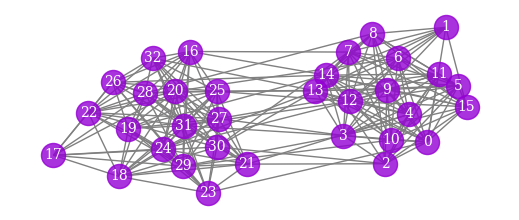

In [48]:
q=33
seed=4
cut_loc = 15
sizes = [16,17]
assert np.sum(sizes)==q, "check your input!!"
p_intra=0.8
p_inter=0.1
p_matrix = [
    [p_intra, p_inter], 
    [p_inter, p_intra], 
]
G = nx.stochastic_block_model(sizes, p_matrix, seed=seed)

edges = list(G.edges())


grouping = grouping_cascades.grouping_cascades(edges,q,cut_loc)
grouping.perform_grouping()
grouping.limit_active_qubits_per_part()

for item in grouping.edges_cascades.items():
    print(item)
print('-----')
for item in grouping.edges_cascade_lim.items():
    print(item)

count_blocks, count_remaining_blocks, count_sep = grouping.count_cuts()
print("Number of blocks + remaining separate cut gates: ", count_blocks, count_remaining_blocks)
print("Total number of separate cut gates: ", count_sep)
print("Total number of 2-qubit gates (i.e. num of edges if 1 layer QAOA): ", len(grouping.edges))

pos = nx.spring_layout(G)

plt.figure(figsize=(5, 2))
nx.draw(
    G, pos, with_labels=True, 
    node_color=(0.58, 0.0, 0.83, 0.8), edge_color='gray',
    node_size=300,  # Adjust node size to make them smaller
    font_family='serif',  # Use a serif font
    font_size=10,  # Optionally, you can adjust font size
    font_color='white'
)
plt.savefig(f"graph_q{q}_cutloc{cut_loc}_{sizes}_pintra{p_intra}_pinter{p_inter}.pdf")

In [99]:
#generate random weights for the qaoa
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(edges))]
weights

[3.872308260953955,
 5.771308188299919,
 1.26209493442926,
 0.39029936765168194,
 1.8007119582261122,
 0.6990110822432329,
 0.30315697388396945,
 1.0325685883512883,
 5.586137045180465,
 2.9384876385053795,
 4.043723489063999,
 0.7746533203991965,
 4.319660032745939,
 0.39233351334761846,
 3.1572230292395487,
 0.3430046515953006,
 2.4590333898757053,
 6.067690802012543,
 2.5657905912414334,
 0.7263132070716319,
 4.461769939368521,
 3.8713141389411208,
 4.162132983233234,
 1.1862847206813676,
 2.11976494786027,
 0.97002926992555,
 3.398409762722149,
 5.756540325227346,
 4.017491172573732,
 3.1845484908129653,
 2.674606755554912,
 0.4271453280369288,
 3.89769766277678,
 3.0733445886104738,
 0.28173753006904967,
 5.804203601219085,
 4.131368237590457,
 4.7720191060470585,
 5.823996419641558,
 2.47368422894973,
 3.1539148201110847,
 1.189328331105049,
 0.10111868657397859,
 5.156801115392244,
 1.8556504479463334,
 0.3044569209570729,
 6.110914571531562,
 0.8431940213960902,
 4.999129995276

In [49]:
#copy weights
weights = [3.872308260953955,
 5.771308188299919,
 1.26209493442926,
 0.39029936765168194,
 1.8007119582261122,
 0.6990110822432329,
 0.30315697388396945,
 1.0325685883512883,
 5.586137045180465,
 2.9384876385053795,
 4.043723489063999,
 0.7746533203991965,
 4.319660032745939,
 0.39233351334761846,
 3.1572230292395487,
 0.3430046515953006,
 2.4590333898757053,
 6.067690802012543,
 2.5657905912414334,
 0.7263132070716319,
 4.461769939368521,
 3.8713141389411208,
 4.162132983233234,
 1.1862847206813676,
 2.11976494786027,
 0.97002926992555,
 3.398409762722149,
 5.756540325227346,
 4.017491172573732,
 3.1845484908129653,
 2.674606755554912,
 0.4271453280369288,
 3.89769766277678,
 3.0733445886104738,
 0.28173753006904967,
 5.804203601219085,
 4.131368237590457,
 4.7720191060470585,
 5.823996419641558,
 2.47368422894973,
 3.1539148201110847,
 1.189328331105049,
 0.10111868657397859,
 5.156801115392244,
 1.8556504479463334,
 0.3044569209570729,
 6.110914571531562,
 0.8431940213960902,
 4.999129995276357,
 0.8732570776370611,
 0.41920963609859574,
 2.1401483083227832,
 4.889575357166889,
 3.1510921829086502,
 2.723403275386706,
 1.1292012642905342,
 2.8086825385646894,
 0.4761223724828496,
 4.8877584454199265,
 4.002259103487067,
 3.468002890136549,
 5.686423710306942,
 3.7977587540738114,
 0.3383546814273561,
 0.14337904111106414,
 3.0235350921765964,
 0.18980183940611492,
 0.8799330865620432,
 1.6531139374581039,
 4.421236205374276,
 2.4977071051994075,
 1.5358600342842286,
 3.446175428949647,
 1.869927655832094,
 3.740684772402587,
 5.166405630781091,
 4.3980025817732455,
 5.032476288669417,
 6.059951918258774,
 5.8966264741285475,
 3.420749327842518,
 3.449080598021324,
 2.8319621697303408,
 5.122927620542158,
 5.7542647612691145,
 4.2975320424705385,
 4.988060731485404,
 0.23454887312279063,
 2.830410933627221,
 2.380778223048913,
 2.657899786959748,
 0.5899877060184252,
 5.969619430617969,
 2.037633755340734,
 1.8522837430147414,
 0.8772196706891426,
 0.8005646633351939,
 3.8088043315563045,
 6.248929200655796,
 2.5396207582441397,
 4.029501139080133,
 5.914324761875434,
 6.214184081792654,
 1.1223928585675516,
 6.033811822037155,
 5.116200940672991,
 6.195678024462289,
 0.9909946972062639,
 2.673220002331758,
 2.70203592316213,
 2.3332011225614107,
 5.008692242776384,
 3.636131496744145,
 6.114874070024594,
 2.224506428638997,
 0.0692974360505641,
 4.883916267738266,
 0.6092570899238113,
 2.1444419803012433,
 3.767127889286804,
 4.969032754264455,
 4.330135227568192,
 5.910595726046299,
 0.0018789963260419677,
 4.1547434257690075,
 4.388489777375556,
 0.5922989845011496,
 0.0934868427001546,
 2.593921537816355,
 5.43407233530009,
 0.9176193724888602,
 2.1507188411344096,
 5.553787133039563,
 0.2574123666329463,
 0.14900146010159054,
 5.9521148310262655,
 0.9392288076667119,
 2.372079362731777,
 4.697965817751061,
 3.0998236593960957,
 5.555756109127094,
 3.9477995964646495,
 6.121086811234897,
 2.1611813509241142,
 5.513098113595316,
 4.406785109153843,
 0.7746479717879141,
 0.1671937211532696,
 0.37232834469504256,
 3.86401689632856,
 4.233847192940404,
 0.4006892628799993,
 2.718970358642131,
 5.2046817557134935,
 0.3337526715420271,
 2.3147965647056377,
 5.76786048027695,
 2.9077881839837105,
 2.3957395462161837,
 2.3330963975246832,
 4.956114122751032,
 1.7960814007188866,
 4.5407120204298135,
 5.967832627947448,
 0.6340898580049922,
 0.49726655699929107,
 4.584108685227912,
 3.8783313908324777,
 5.812308620898796,
 6.12368906408084,
 2.487723520146852,
 1.48483532202818,
 1.2158568269781151,
 3.3113125564880206,
 1.503576758315286,
 5.328493642913249,
 1.8932043735164055,
 5.72033156676719,
 0.02254474609032507,
 1.5658236937105585,
 4.347030653174502,
 0.6764801214629989,
 2.4502226149163353,
 4.850224361138333,
 0.4468198450014538,
 0.9102116096126586,
 5.972192163454275,
 0.8003833633454052,
 3.4849564612033,
 2.8485999024792674,
 1.4199564797456876,
 5.046833812600322,
 1.6237458846544393,
 2.0591235802915895,
 2.3331919863505477,
 1.3903643648177468,
 3.8797369766388816,
 3.0338377018047273,
 2.911719043154651,
 4.328522250455258,
 2.41949021107927,
 4.943648058785142,
 3.2715841550622424,
 5.79998515350038,
 5.0037768434060235,
 2.230290609772452,
 1.7150280514781022,
 3.5067376433810136,
 0.523631793821084,
 1.9793166764151486,
 0.3547163637223944,
 1.513712482547149,
 2.1798673455017856,
 1.6417810536015407,
 5.206993661789504,
 1.5455337047738256,
 2.7339180529471703,
 4.045392039187393,
 0.17331267622716426]

In [50]:
angles = [1.55739, 2.32636]
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

#generate qsim files names
block_name = f"grouping_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
noblock_name = f"grouping_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"

In [51]:
grouping.create_qaoa_qsim(angles, 1, noblock_name, weights)
grouping.create_qaoa_qsim(angles, 2, block_name, weights)

Circuit written into grouping_noblock_q33_cutloc15_blockgraph_seed4_sizes_16_17_angles_155739_232636_pinter010_pintra080_weights
Circuit written into grouping_block_q33_cutloc15_blockgraph_seed4_sizes_16_17_angles_155739_232636_pinter010_pintra080_weights


In [52]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =427.59520000000003, std=0.1023667914902157
Block: Mean =7.409254000000002, std=0.2643994906651674
--------Sim times---------
No cut: Mean =425.51899999999995, std=0.09464882460972611
Block: Mean =7.401797999999999, std=0.26329227253377563
-----Paths-----
Block: 16384
--------Ratios--------
S/J = 57.71096523347694
T/J >= 485.87887525518755


### $q=33$ sizes=[16,16], $p_{inter}=0.09$

('15', [(15, 16), (15, 18), (15, 23), (15, 26), (15, 30)])
('4', [(4, 16), (4, 18), (4, 20), (4, 28)])
('18', [(3, 18)])
('16', [(12, 16)])
('28', [(8, 28), (9, 28)])
('14', [(14, 32), (14, 22), (14, 23)])
('31', [(6, 31), (13, 31)])
('29', [(7, 29), (10, 29)])
('10', [(10, 27)])
('23s0', [(0, 24)])
('0s0', [(2, 25)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 6), (1, 7), (1, 8), (1, 9), (1, 12), (1, 13), (1, 14), (1, 15), (2, 3), (2, 4), (2, 5), (2, 8), (2, 9), (2, 11), (2, 14), (2, 15), (3, 4), (3, 5), (3, 6), (3, 7), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 7), (6, 10), (6, 12), (6, 13), (6, 15), (7, 8), (7, 10), (7, 12), (7, 13), (7, 14), (7, 15), (8, 9), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (9, 10), (9, 

/home/herzog/laura_files/joint_cutting_qsimh/.venv/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


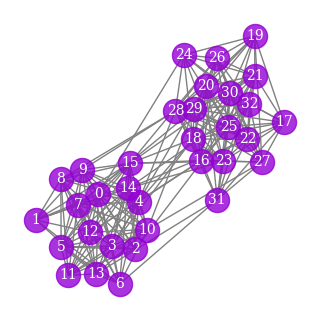

In [53]:
q=33
seed=4
cut_loc = 15
sizes = [16,17]
assert np.sum(sizes)==q, "check your input!!"
p_intra=0.8
p_inter=0.09
p_matrix = [
    [p_intra, p_inter], 
    [p_inter, p_intra], 
]
G = nx.stochastic_block_model(sizes, p_matrix, seed=seed)

edges = list(G.edges())


grouping = grouping_cascades.grouping_cascades(edges,q,cut_loc)
grouping.perform_grouping()
grouping.limit_active_qubits_per_part()

for item in grouping.edges_cascades.items():
    print(item)
print('-----')
for item in grouping.edges_cascade_lim.items():
    print(item)

count_blocks, count_remaining_blocks, count_sep = grouping.count_cuts()
print("Number of blocks + remaining separate cut gates: ", count_blocks, count_remaining_blocks)
print("Total number of separate cut gates: ", count_sep)
print("Total number of 2-qubit gates (i.e. num of edges if 1 layer QAOA): ", len(grouping.edges))

pos = nx.spring_layout(G)

plt.figure(figsize=(3, 3))
nx.draw(
    G, pos, with_labels=True, 
    node_color=(0.58, 0.0, 0.83, 0.8), edge_color='gray',
    node_size=300,  # Adjust node size to make them smaller
    font_family='serif',  # Use a serif font
    font_size=10,  # Optionally, you can adjust font size
    font_color='white'
)
plt.savefig(f"graph_q{q}_cutloc{cut_loc}_{sizes}_pintra{p_intra}_pinter{p_inter}.pdf")

In [107]:
#generate random weights for the qaoa
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(edges))]
weights

[3.1818098705290327,
 0.585560037988389,
 1.793423494144157,
 0.996684561544787,
 5.902780773181617,
 5.562211046615746,
 3.065460279756973,
 4.613780327964029,
 4.738653626155731,
 0.6491051531983386,
 1.0726323964248938,
 0.9855637733177096,
 5.185742673623509,
 1.7537648696642316,
 0.3347547740622341,
 0.7462109192304555,
 0.20666813301619766,
 0.5048251143595657,
 3.1182892572974508,
 1.6224464582710723,
 1.484556849422772,
 5.015254572868658,
 6.097702475903935,
 2.259972327388603,
 3.565965377186776,
 3.4921638963714043,
 0.9287158960186196,
 0.9287096780912879,
 3.691503064983848,
 4.717661423692988,
 2.1716571892402134,
 1.6340012188199426,
 3.642112778235732,
 3.4555600644488393,
 4.8317744607671305,
 5.749207798491341,
 2.1988575249267646,
 0.8981779271946101,
 1.1827212134011842,
 1.405348859734421,
 4.296785700309644,
 2.000486135720737,
 0.6323783230326795,
 4.0796836973668436,
 0.8981229353690127,
 3.7973527991678817,
 0.6095029911289322,
 4.5469485646223715,
 1.959155330

In [54]:
#copy weights
weights = [3.1818098705290327,
 0.585560037988389,
 1.793423494144157,
 0.996684561544787,
 5.902780773181617,
 5.562211046615746,
 3.065460279756973,
 4.613780327964029,
 4.738653626155731,
 0.6491051531983386,
 1.0726323964248938,
 0.9855637733177096,
 5.185742673623509,
 1.7537648696642316,
 0.3347547740622341,
 0.7462109192304555,
 0.20666813301619766,
 0.5048251143595657,
 3.1182892572974508,
 1.6224464582710723,
 1.484556849422772,
 5.015254572868658,
 6.097702475903935,
 2.259972327388603,
 3.565965377186776,
 3.4921638963714043,
 0.9287158960186196,
 0.9287096780912879,
 3.691503064983848,
 4.717661423692988,
 2.1716571892402134,
 1.6340012188199426,
 3.642112778235732,
 3.4555600644488393,
 4.8317744607671305,
 5.749207798491341,
 2.1988575249267646,
 0.8981779271946101,
 1.1827212134011842,
 1.405348859734421,
 4.296785700309644,
 2.000486135720737,
 0.6323783230326795,
 4.0796836973668436,
 0.8981229353690127,
 3.7973527991678817,
 0.6095029911289322,
 4.5469485646223715,
 1.9591553309113436,
 0.21366892033358686,
 6.077659659398924,
 4.304395897719646,
 5.972806675938044,
 2.422955317334326,
 2.23286174082862,
 1.3083527056329602,
 4.072323507899927,
 3.961260636202968,
 5.81014605169137,
 3.0128055190880416,
 4.444384268845368,
 2.6488771472267576,
 2.6215279230292765,
 1.3261455009127037,
 2.0229924715937138,
 5.145701405166017,
 6.123470442445867,
 3.16585542751635,
 3.7476974087185524,
 4.432416950829185,
 2.963419428246534,
 3.1057655711224785,
 0.6620692109446512,
 3.1533764359746774,
 3.508192717228944,
 5.191311975609443,
 1.2823443299527042,
 0.7132495956592574,
 5.600313605867563,
 4.805214085725168,
 5.6034314380565915,
 2.341262741065819,
 0.046769695515193006,
 0.5403587765595452,
 3.424116619141614,
 0.6104558547984023,
 0.008395921813232213,
 1.4572803798398222,
 3.3812767826229275,
 2.4881272089141344,
 1.1649533857198862,
 5.606027696971355,
 2.556963576606461,
 2.3576554239017216,
 0.38050970223354097,
 5.492528362075726,
 6.117279570181526,
 4.962972072531817,
 4.458654602489186,
 2.447597932270871,
 5.801362258716834,
 2.033252582224045,
 3.627257610121239,
 1.177828682879243,
 1.3988830876519485,
 3.8719207862047362,
 2.361455409321692,
 1.6789525519553123,
 4.6078318198631525,
 4.626671007090486,
 5.1692815375955,
 2.474110180351992,
 2.425628105651496,
 6.213781450264553,
 5.704630146272452,
 5.404905810938201,
 5.802370633559044,
 6.215663968877269,
 0.08380954927917157,
 1.8665727071378975,
 3.928742607581439,
 5.872823170858531,
 1.0402229839406947,
 0.03559323404134473,
 5.7987976829837,
 5.928010214075136,
 5.665044850978367,
 1.9078258516094502,
 1.4910122526952378,
 3.591774149500814,
 4.114190696167047,
 2.948812669852126,
 2.44932006511926,
 1.1964251647780682,
 0.5909559356983913,
 2.752241998013586,
 2.058098981165601,
 4.667162988608212,
 2.553867695582921,
 5.418308264355801,
 2.386056761184645,
 0.550355058329962,
 6.150390330330115,
 6.078167150227907,
 3.410409364272828,
 2.722873556530467,
 2.3441159276254857,
 1.4197067312586364,
 3.530131012972489,
 5.091292788173699,
 3.155371798378757,
 5.380385438013016,
 2.3258563750542143,
 1.199376593185351,
 3.5373223794418163,
 3.2868391875405085,
 1.935514195658472,
 2.4002331306172255,
 3.6823455291174136,
 5.005910039731519,
 2.4199055766934676,
 4.783044538630424,
 2.3336126948200033,
 3.540222667818494,
 4.993733846092094,
 1.209274214632916,
 0.3717246096751653,
 6.139623057109535,
 4.286607781422556,
 0.232214193616149,
 2.21618882719944,
 1.4541310440201645,
 2.812278519703155,
 0.03294316558754191,
 4.822339694146907,
 2.0764780803539127,
 6.201804514314828,
 4.734686433345937,
 2.0087603828136924,
 5.835623541607578,
 1.9072564726422838,
 0.8849334025290966,
 2.5399859466516594,
 0.7911090768035699,
 5.948454421304931,
 0.5664279004960031,
 0.8430312679748744,
 5.173722046565172,
 1.3517582807260191,
 4.344612340576464,
 5.886728550873358,
 0.7023370424034577,
 1.470996520821022,
 4.731130302886648,
 1.8597292514455666,
 2.277363520599824,
 1.4111799339288538,
 0.24352420463562582,
 2.3445489921994733,
 1.8029937326867311,
 2.286898821551739,
 2.38135910596869,
 1.0646644110268055,
 3.134264053801308,
 3.08085904340484,
 2.8828053246572067,
 4.589173356994003,
 5.081315905054079,
 3.921642254807442,
 0.17159246256120209,
 3.058313414491679,
 3.8398105234579605,
 3.967075398881781,
 0.5513292179900782,
 1.0993241271899237,
 6.202561734569227,
 0.5346657725653419,
 6.081650280200701]

In [55]:
angles = [1.55739, 2.32636]
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

#generate qsim files names
block_name = f"grouping_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
noblock_name = f"grouping_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"

In [56]:
grouping.create_qaoa_qsim(angles, 1, noblock_name, weights)
grouping.create_qaoa_qsim(angles, 2, block_name, weights)

Circuit written into grouping_noblock_q33_cutloc15_blockgraph_seed4_sizes_16_17_angles_155739_232636_pinter009_pintra080_weights
Circuit written into grouping_block_q33_cutloc15_blockgraph_seed4_sizes_16_17_angles_155739_232636_pinter009_pintra080_weights


In [57]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =426.63419999999996, std=1.5651746739581525
Block: Mean =0.9821052, std=0.026022781030474017
--------Sim times---------
No cut: Mean =424.56499999999994, std=1.5645373757120697
Block: Mean =0.955836, std=0.026763522346656857
-----Paths-----
Block: 2048
--------Ratios--------
S/J = 434.4078414410187
T/J >= 3665.595091035054


### $q=33$, sizes=[16,17], $p_{inter}=0.12$

('17', [(0, 17), (4, 17), (8, 17), (9, 17), (12, 17)])
('4', [(4, 18), (4, 21), (4, 23), (4, 26)])
('18', [(1, 18), (11, 18)])
('27', [(1, 27), (5, 27), (14, 27)])
('3', [(3, 21), (3, 28), (3, 31)])
('5', [(5, 32), (5, 31)])
('9', [(9, 22), (9, 30)])
('11', [(11, 19), (11, 30)])
('1s0', [(6, 24)])
('1s1', [(8, 32)])
('1s2', [(12, 24)])
('1s3', [(15, 26)])
('21s0', [(7, 25)])
('21s1', [(14, 22)])
('31s0', [(10, 19)])
('remainder', [(0, 3), (0, 4), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 13), (1, 14), (1, 15), (2, 3), (2, 4), (2, 5), (2, 6), (2, 8), (2, 9), (2, 11), (2, 12), (2, 14), (2, 15), (3, 4), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 14), (4, 5), (4, 8), (4, 9), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (5, 6), (5, 8), (5, 10), (5, 12), (5, 13), (5, 14), (5, 15), (6, 7), (6, 8), (6, 9), (6, 10), (6, 12), (6, 13), (6, 15), (7, 9), (7, 10), (7, 11), (7

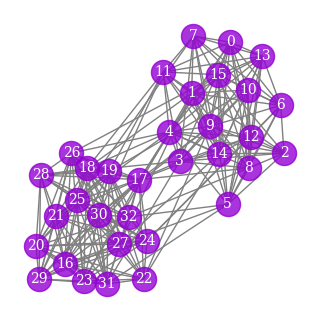

In [15]:
q=33
seed=2
cut_loc = 15
sizes = [16,17]
assert np.sum(sizes)==q, "check your input!!"
p_intra=0.8
p_inter=0.12
p_matrix = [
    [p_intra, p_inter], 
    [p_inter, p_intra], 
]
G = nx.stochastic_block_model(sizes, p_matrix, seed=seed)

edges = list(G.edges())


grouping = grouping_cascades.grouping_cascades(edges,q,cut_loc)
grouping.perform_grouping()
grouping.limit_active_qubits_per_part()

for item in grouping.edges_cascades.items():
    print(item)
print('-----')
for item in grouping.edges_cascade_lim.items():
    print(item)

count_blocks, count_remaining_blocks, count_sep = grouping.count_cuts()
print("Number of blocks + remaining separate cut gates: ", count_blocks, count_remaining_blocks)
print("Total number of separate cut gates: ", count_sep)
print("Total number of 2-qubit gates (i.e. num of edges if 1 layer QAOA): ", len(grouping.edges))

pos = nx.spring_layout(G)

plt.figure(figsize=(3, 3))
nx.draw(
    G, pos, with_labels=True, 
    node_color=(0.58, 0.0, 0.83, 0.8), edge_color='gray',
    node_size=300,  # Adjust node size to make them smaller
    font_family='serif',  # Use a serif font
    font_size=10,  # Optionally, you can adjust font size
    font_color='white'
)
#plt.savefig(f"graph_q{q}_cutloc{cut_loc}_{sizes}_pintra{p_intra}_pinter{p_inter}.pdf")

In [16]:
#generate random weights for the qaoa
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(edges))]
weights

[1.4309772380707022,
 0.8864494679731427,
 2.8435704986405534,
 0.5972878814911393,
 5.508637509385192,
 1.7511023718496734,
 4.358786312501517,
 3.9797402947872804,
 4.413597479061334,
 1.3034800554435135,
 5.186206115264567,
 2.805896075116977,
 4.216408699085657,
 5.552298306757615,
 0.38453070761478314,
 2.3666636381426303,
 0.38044467221561956,
 3.9958858128136745,
 4.639883850717688,
 4.812376112353205,
 2.9776316866300965,
 3.3446720847558846,
 4.7667351932727495,
 0.32227218297339505,
 3.313979648322275,
 1.867781847134499,
 3.2461685485519984,
 3.586650870262613,
 0.8520561664004591,
 2.6540934429670457,
 3.1287284962100617,
 3.425852371621736,
 4.120490719746221,
 0.0032226720062807856,
 5.231946855839487,
 3.6653771426655806,
 3.145739756322311,
 4.482780105270344,
 5.760411718016908,
 5.080194875656533,
 5.530062906045401,
 0.09917700804193068,
 1.8320628268640091,
 3.5502197484976366,
 3.3021768732457097,
 0.3768614465852297,
 6.24566521344633,
 3.137066302253288,
 0.26789

In [17]:
#copy weights
weights = [1.4309772380707022,
 0.8864494679731427,
 2.8435704986405534,
 0.5972878814911393,
 5.508637509385192,
 1.7511023718496734,
 4.358786312501517,
 3.9797402947872804,
 4.413597479061334,
 1.3034800554435135,
 5.186206115264567,
 2.805896075116977,
 4.216408699085657,
 5.552298306757615,
 0.38453070761478314,
 2.3666636381426303,
 0.38044467221561956,
 3.9958858128136745,
 4.639883850717688,
 4.812376112353205,
 2.9776316866300965,
 3.3446720847558846,
 4.7667351932727495,
 0.32227218297339505,
 3.313979648322275,
 1.867781847134499,
 3.2461685485519984,
 3.586650870262613,
 0.8520561664004591,
 2.6540934429670457,
 3.1287284962100617,
 3.425852371621736,
 4.120490719746221,
 0.0032226720062807856,
 5.231946855839487,
 3.6653771426655806,
 3.145739756322311,
 4.482780105270344,
 5.760411718016908,
 5.080194875656533,
 5.530062906045401,
 0.09917700804193068,
 1.8320628268640091,
 3.5502197484976366,
 3.3021768732457097,
 0.3768614465852297,
 6.24566521344633,
 3.137066302253288,
 0.267892885482596,
 5.479089863343307,
 2.7242727679938854,
 4.748651321287988,
 2.1920789117414925,
 3.7083662116941434,
 0.13330757500583276,
 2.189574127561769,
 2.684188621116564,
 3.0167809397819023,
 3.1241791968945116,
 5.409247614273099,
 4.350987884814729,
 5.538046356834653,
 4.635206412045306,
 3.3337563529799783,
 1.1445584448145956,
 2.6656680327202946,
 0.2282704577558279,
 3.486052577686886,
 6.236447837179271,
 3.020357216748637,
 4.085983355506058,
 4.545158888490154,
 5.964251604862656,
 3.5804022383412715,
 5.438540370583076,
 2.1041497471164696,
 4.325515302205371,
 4.111377331540821,
 5.04536258585382,
 3.448710694469096,
 0.5683741055719994,
 2.1529434723103753,
 3.605772793601237,
 5.923134588883089,
 0.7461929919277195,
 6.140507765313895,
 2.8974172273947945,
 0.9520258666452072,
 2.0580468606085383,
 2.9476828042499656,
 1.7114702728209086,
 3.4163760089016155,
 5.5380561339942656,
 3.423286412053118,
 3.32094228316203,
 0.19363610264243625,
 3.300904699002198,
 4.130764067637278,
 3.5690519869976725,
 4.522469847194089,
 4.094797925962156,
 2.2285763160678935,
 4.050067272069002,
 1.9418529115217265,
 0.7178791134795177,
 2.147690394122116,
 1.8718221296048412,
 0.4779560979187514,
 0.8006417720938885,
 4.787517296588807,
 1.5016775946549734,
 2.110507242241201,
 3.0443334634097976,
 1.845427462205109,
 6.204708583050432,
 2.870557638170189,
 2.3711466096898586,
 1.991782473298694,
 4.53739106431798,
 4.293721177092596,
 1.5048051191379137,
 2.592251797042547,
 0.05087774742459459,
 4.816718929511627,
 0.8945778332227078,
 5.697212677386904,
 0.7044648290816169,
 0.44393060142522356,
 5.975853306116059,
 0.23364021523786793,
 4.065717171242794,
 5.437694351245624,
 0.3465079516234779,
 4.0134026278601995,
 3.884429076383075,
 4.994983243664743,
 5.076828370840321,
 3.0824252977537947,
 4.31980227968971,
 1.631586248045152,
 1.4231203018129948,
 0.02963427681261011,
 0.39041663755621403,
 3.137184186857123,
 0.11875642907563742,
 4.41029273096832,
 1.0919599309137435,
 4.311285065007769,
 5.717073856910749,
 0.9843894594128784,
 2.2871528735115403,
 0.773887996685304,
 5.382055184206247,
 4.762656734975101,
 2.2332525754058783,
 2.515177303964218,
 5.963593573134048,
 3.290257587830858,
 6.001373709802669,
 5.822954318809734,
 0.5302786229828274,
 4.860544479889564,
 1.1744112062892544,
 0.9187380204951618,
 2.715728506902318,
 0.33220329731164744,
 2.1360735282278234,
 5.573361392588414,
 5.839424714408242,
 4.535614786665798,
 2.72496487887192,
 3.330203342211349,
 0.05667344246715791,
 5.610654975723254,
 4.452890948295233,
 2.3052291485808607,
 5.0828619833639666,
 0.27113421293501977,
 3.807086534786334,
 0.745704166689083,
 4.638872547467801,
 2.2170000115435293,
 3.3179600861335485,
 1.5426690965907792,
 4.875454586720696,
 1.593250501714008,
 5.347585306675643,
 2.5140981384855103,
 4.333031074783783,
 0.3304621444007703,
 4.281673061804779,
 1.6292905333193868,
 3.022218119033449,
 3.5153731674589195,
 5.842973879888519,
 0.016488415893519365,
 0.09493668586865806,
 0.22565721708287964,
 0.21310656404577086,
 3.8400512283790467,
 2.0684833412109316,
 4.642631788895211,
 2.4619555201503283,
 0.798237512424177,
 5.866609932744447,
 5.585035222921713,
 3.93892926823064,
 3.670357348330805,
 2.3521575541277087,
 2.801571354217626,
 0.656916921339202,
 1.0152976149447577,
 3.3259805733219854,
 2.821981870407007,
 2.3454637642797946,
 0.0256905075842836,
 1.944179642766249,
 1.2437965337341514,
 5.012689926030685,
 1.3991405021344918,
 1.3235447101529123,
 5.872088040314807,
 1.3971528375061257,
 5.68728872411556,
 1.5467801260358645,
 0.3350163319905722,
 0.9928207061139277,
 3.5517079704874392,
 1.1555235228156004,
 3.683389945407461,
 3.6328904237438,
 5.33531390050529,
 2.6650728993548674,
 0.8246320513355473]

In [18]:
angles = [1.55739, 2.32636]
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

#generate qsim files names
block_name = f"grouping_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
noblock_name = f"grouping_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"

In [19]:
grouping.create_qaoa_qsim(angles, 1, noblock_name, weights)
grouping.create_qaoa_qsim(angles, 2, block_name, weights)

Circuit written into grouping_noblock_q33_cutloc15_blockgraph_seed2_sizes_16_17_angles_155739_232636_pinter012_pintra080_weights
Circuit written into grouping_block_q33_cutloc15_blockgraph_seed2_sizes_16_17_angles_155739_232636_pinter012_pintra080_weights


In [20]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =463.8466, std=12.571123316553695
Block: Mean =16.88392, std=0.10035085251257236
--------Sim times---------
No cut: Mean =457.0352, std=3.1282240584715226
Block: Mean =16.84314, std=0.10363873021221304
-----Paths-----
Block: 32768
--------Ratios--------
S/J = 27.472684068628613
T/J >= 213.220626489583


### $q=31$ sizes=[15,16], $p_{inter}=0.11$

('17', [(1, 17), (5, 17), (9, 17), (15, 17)])
('20', [(1, 20), (6, 20), (8, 20), (10, 20)])
('21', [(0, 21), (12, 21), (14, 21)])
('1', [(1, 23)])
('23', [(10, 23), (13, 23)])
('5', [(5, 18), (5, 30)])
('12', [(12, 26), (12, 29)])
('0', [(0, 25)])
('25', [(6, 25)])
('30', [(4, 30)])
('18', [(7, 18)])
('6s0', [(3, 22)])
('6s1', [(8, 29)])
('6s2', [(14, 19)])
('7', [(7, 27)])
('8s0', [(9, 28)])
('remainder', [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 9), (0, 10), (0, 12), (0, 14), (0, 15), (1, 2), (1, 3), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 14), (1, 15), (2, 4), (2, 6), (2, 8), (2, 11), (2, 12), (2, 13), (2, 15), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 12), (4, 5), (4, 6), (4, 10), (4, 11), (4, 12), (4, 14), (4, 15), (5, 6), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 14), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (8, 9), (8, 11), (8, 14), (8

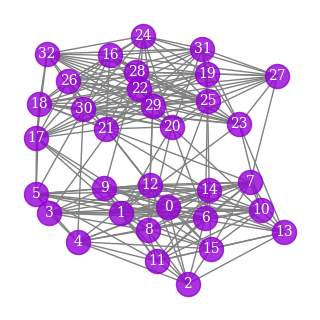

In [6]:
q=33
seed=3
cut_loc = 15
sizes = [16,17]
assert np.sum(sizes)==q, "check your input!!"
p_intra=0.8
p_inter=0.11
p_matrix = [
    [p_intra, p_inter], 
    [p_inter, p_intra], 
]
G = nx.stochastic_block_model(sizes, p_matrix, seed=seed)

edges = list(G.edges())


grouping = grouping_cascades.grouping_cascades(edges,q,cut_loc)
grouping.perform_grouping()
grouping.limit_active_qubits_per_part()

for item in grouping.edges_cascades.items():
    print(item)
print('-----')
for item in grouping.edges_cascade_lim.items():
    print(item)

count_blocks, count_remaining_blocks, count_sep = grouping.count_cuts()
print("Number of blocks + remaining separate cut gates: ", count_blocks, count_remaining_blocks)
print("Total number of separate cut gates: ", count_sep)
print("Total number of 2-qubit gates (i.e. num of edges if 1 layer QAOA): ", len(grouping.edges))

pos = nx.spring_layout(G)

plt.figure(figsize=(3, 3))
nx.draw(
    G, pos, with_labels=True, 
    node_color=(0.58, 0.0, 0.83, 0.8), edge_color='gray',
    node_size=300,  # Adjust node size to make them smaller
    font_family='serif',  # Use a serif font
    font_size=10,  # Optionally, you can adjust font size
    font_color='white'
)
#plt.savefig(f"graph_q{q}_cutloc{cut_loc}_{sizes}_pintra{p_intra}_pinter{p_inter}.pdf")

In [7]:
#generate random weights for the qaoa
weights = [random.uniform(0, 2 * np.pi) for _ in range(len(edges))]
weights

[2.767060675279709,
 1.2534532166780246,
 5.320309648898371,
 0.2878224777635301,
 3.237144601318439,
 4.3715593716455,
 1.1934229048819436,
 4.061338413063244,
 5.244161264948865,
 1.32008652853601,
 0.8462949043684405,
 1.765125109212347,
 3.5598718002993412,
 3.737736335211967,
 4.786897991499074,
 3.9263075451393687,
 1.4942219988288679,
 6.2499553452229515,
 4.560529848664144,
 3.763400290527699,
 6.258127874429164,
 3.149480281304575,
 0.7950260311404207,
 4.931365229883518,
 2.4228752957670805,
 0.6279327606125289,
 2.2173323161833696,
 2.924152579612425,
 1.8389691489025715,
 0.08280798365656847,
 0.5896790440778729,
 1.429066149142108,
 5.679396848855426,
 5.45985470306482,
 5.061943510119443,
 0.6391716885604157,
 3.8915665282407637,
 4.800256444778728,
 1.5166281429422936,
 5.30499305092781,
 1.3306315672712348,
 3.9197552310822963,
 3.1122007000768375,
 4.373615802863616,
 0.8301781771283853,
 3.68760076731009,
 1.1250297284667672,
 2.6134160233717023,
 4.904948455720345,
 

In [8]:
#copy weights
weights = [2.767060675279709,
 1.2534532166780246,
 5.320309648898371,
 0.2878224777635301,
 3.237144601318439,
 4.3715593716455,
 1.1934229048819436,
 4.061338413063244,
 5.244161264948865,
 1.32008652853601,
 0.8462949043684405,
 1.765125109212347,
 3.5598718002993412,
 3.737736335211967,
 4.786897991499074,
 3.9263075451393687,
 1.4942219988288679,
 6.2499553452229515,
 4.560529848664144,
 3.763400290527699,
 6.258127874429164,
 3.149480281304575,
 0.7950260311404207,
 4.931365229883518,
 2.4228752957670805,
 0.6279327606125289,
 2.2173323161833696,
 2.924152579612425,
 1.8389691489025715,
 0.08280798365656847,
 0.5896790440778729,
 1.429066149142108,
 5.679396848855426,
 5.45985470306482,
 5.061943510119443,
 0.6391716885604157,
 3.8915665282407637,
 4.800256444778728,
 1.5166281429422936,
 5.30499305092781,
 1.3306315672712348,
 3.9197552310822963,
 3.1122007000768375,
 4.373615802863616,
 0.8301781771283853,
 3.68760076731009,
 1.1250297284667672,
 2.6134160233717023,
 4.904948455720345,
 3.276059263648615,
 3.778448909296254,
 1.5719694347818842,
 5.508180022304134,
 5.80647023389001,
 4.653190162957611,
 2.0815202999144335,
 2.313613778757309,
 2.4271142357015556,
 3.750293716648835,
 2.897366666167927,
 4.747128978304034,
 5.427770470583332,
 4.283280595393538,
 3.1617436249380226,
 5.201248905471398,
 0.24097303865595557,
 0.19071062398342073,
 5.653077594095448,
 2.3667172830843923,
 6.208803712012586,
 0.6903389864538249,
 4.3307352151686045,
 1.7136161646403227,
 5.852766795879497,
 3.513256648444586,
 0.8081769923812928,
 3.8712978571601715,
 0.35320060713682516,
 0.06344232783801265,
 5.302034736581321,
 4.834493398077136,
 2.1311777115615693,
 3.9688280902260833,
 4.526320415173135,
 1.0939103067476248,
 4.213734872421186,
 2.4181791077758024,
 1.321198238408575,
 5.60622666853407,
 3.9703703970768065,
 1.0552538457828975,
 4.147497662319455,
 2.1773845985495313,
 1.8840816124701654,
 0.38459360328123815,
 1.2178084366013335,
 5.718633140842167,
 4.012821703268244,
 0.5932274140097465,
 0.47175546203611485,
 0.026318181682472602,
 2.0572026385157924,
 0.09139781742822722,
 4.317374467592712,
 4.0606701320461225,
 2.688689534238078,
 5.541851779112039,
 5.78466357030813,
 4.86580939134083,
 1.968158299156944,
 3.3077422988863545,
 4.149304899850707,
 5.973135572970205,
 4.763854290154685,
 5.499546554363753,
 2.7856973971584966,
 5.228067770047743,
 0.5559365754268804,
 0.9963996987480883,
 2.2718633358018643,
 3.8158864888021546,
 4.990566521046481,
 3.10662473625086,
 3.3211355969715717,
 5.4517916279500085,
 5.007428049769894,
 5.89666559003757,
 1.6998088647519347,
 1.182413346872726,
 2.8855078887632293,
 0.8989593470054046,
 6.199419282327006,
 0.33949413463216743,
 6.1260391512956165,
 1.4065961301803396,
 2.6427094477968853,
 6.148682819203585,
 5.550593738902612,
 2.2574930917630116,
 1.9665285583826337,
 1.3644401874438434,
 6.192249306046161,
 2.7021165940956524,
 2.121296915943288,
 3.2105033199394852,
 1.7590785797238389,
 1.4570022178483528,
 4.017163653598146,
 2.386848786015969,
 1.556500012324063,
 1.6969886758192267,
 6.209625978620629,
 3.7313335349106196,
 2.739986026364737,
 1.1521757874649392,
 1.3722540498109583,
 3.2508799036722826,
 5.201769136618232,
 5.852051442063717,
 1.3143785186317392,
 1.6774793856831847,
 2.3735098637985983,
 5.392335550683239,
 3.241302375489843,
 0.3293760991665842,
 3.1521776923326486,
 4.165304800733799,
 1.7754482750365694,
 1.8019557077216666,
 0.6973609234436162,
 6.0362658390155035,
 1.9680061868531389,
 3.9224985184588803,
 5.338348820181527,
 5.416192677232311,
 5.257931928137622,
 3.770557978594713,
 0.28640821951043405,
 6.011909266772719,
 0.8309998676823125,
 5.354019176698221,
 3.827680306516886,
 0.25585187116437474,
 0.7424546785095664,
 5.236352573364839,
 0.5432842822638488,
 2.1433525379570244,
 4.467004434906204,
 6.206137071353001,
 0.7356272106259346,
 3.238068498692367,
 5.342636658249499,
 1.2360687740448186,
 1.9954103585808511,
 1.091009913876072,
 1.144375368352245,
 3.3029916421983105,
 6.25889117533472,
 5.037378449465043,
 4.262744049168919,
 3.776295098888316,
 4.5637303208165365,
 0.04395616061770195,
 6.173125599704906,
 5.006353660197814,
 4.812372821156956,
 4.233731120740944,
 3.7869493698499896,
 1.4010213365962945,
 5.501516046928963,
 4.740129825545753,
 3.0685509505138264,
 0.4727411750981189,
 1.9863287583162141,
 3.151131725305598,
 1.692832439822703,
 4.134844401500074,
 4.155466281606809,
 5.669370473332359,
 6.264715311321685,
 5.1924358798430665,
 0.4121881002066173,
 5.9498443051173195]

In [9]:
angles = [1.55739, 2.32636]
angles_str = [f"{a:.5f}".replace(".", "") for a in angles]
angles_str = "_".join(angles_str)

sizes_str = "_".join(map(str, sizes))
pinter_str = f"{p_inter:.2f}".replace(".", "")
pintra_str = f"{p_intra:.2f}".replace(".", "")

#generate qsim files names
block_name = f"grouping_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
noblock_name = f"grouping_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes_{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"

In [10]:
grouping.create_qaoa_qsim(angles, 1, noblock_name, weights)
grouping.create_qaoa_qsim(angles, 2, block_name, weights)

Circuit written into grouping_noblock_q33_cutloc15_blockgraph_seed3_sizes_16_17_angles_155739_232636_pinter011_pintra080_weights
Circuit written into grouping_block_q33_cutloc15_blockgraph_seed3_sizes_16_17_angles_155739_232636_pinter011_pintra080_weights


In [11]:

#amplitude checking
i=0
num_amps=1000000
t=16
amps_nocut = f"./logs/amps_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_block = f"./logs/amps_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"
amps_noblock = f"./logs/amps_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights_rep{i}.log"

readout.compare_files(amps_block, amps_nocut)

#print times
reps=5
suffix = ""
path_nocut = f"./logs/times_nocut_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_block = f"./logs/times_block_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
path_noblock = f"./logs/times_noblock_q{q}_cutloc{cut_loc}_blockgraph_seed{seed}_sizes{sizes_str}_angles_{angles_str}_pinter{pinter_str}_pintra{pintra_str}_weights"
readout.print_diffs(reps, path_nocut, path_block, path_noblock, suffix)


All fine within the given tolerance 1e-07
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
No block was obviously timed out.
--------Full times---------
No cut: Mean =435.86440000000005, std=0.18338004253463297
Block: Mean =34.04216, std=1.1088329190640036
--------Sim times---------
No cut: Mean =433.7866, std=0.18775686405560663
Block: Mean =34.03084, std=1.10979966228144
-----Paths-----
Block: 65536
--------Ratios--------
S/J = 12.803664632326504
T/J >= 105.75122142660747


In [ ]:
#translate the output into latex commands

import re
import math

def format_output_to_latex(output: str, x: str) -> str:
    # Helper function to round numbers to 3 decimal places
    def round_str(number_str):
        return f"{float(number_str):.3f}"

    # Extracting values using regular expressions
    mean_std_regex = r"Mean =([\d.]+), std=([\d.e-]+)"
    paths_regex = r"Paths-----\nBlock: (\d+)(?:\nNo Block: (\d+))?"
    ratios_regex = r"Ratios--------\nS/J = ([\d.e+-]+)\nT/J ?[>=]* ([\d.e+-]+)"

    full_times_no_cut = re.findall(mean_std_regex, output.split('Full times')[1].split('Sim times')[0])
    sim_times_no_cut = re.findall(mean_std_regex, output.split('Sim times')[1].split('Paths')[0])
    paths = re.findall(paths_regex, output)
    ratios = re.findall(ratios_regex, output)

    # Check for "No block was obviously timed out"
    no_block_timed_out = "No block was obviously timed out." in output

    # Assigning extracted values and rounding them
    full_times_no_cut_mean, full_times_no_cut_std = map(round_str, full_times_no_cut[0])
    sim_times_no_cut_mean, sim_times_no_cut_std = map(round_str, sim_times_no_cut[0])

    full_times_block_mean, full_times_block_std = map(round_str, full_times_no_cut[1])
    sim_times_block_mean, sim_times_block_std = map(round_str, sim_times_no_cut[1])

    if no_block_timed_out:
        full_times_no_block = "timed out (1 h)"
        sim_times_no_block = "timed out (1 h)"
        paths_no_block_power = 'x'
    else:
        full_times_no_block_mean, full_times_no_block_std = map(round_str, full_times_no_cut[2])
        sim_times_no_block_mean, sim_times_no_block_std = map(round_str, sim_times_no_cut[2])
        full_times_no_block = f"${full_times_no_block_mean}\\, ({full_times_no_block_std})$"
        sim_times_no_block = f"${sim_times_no_block_mean}\\,({sim_times_no_block_std})$"
        paths_no_block = paths[0][1]
        paths_no_block_power = int(math.log2(int(paths_no_block)))

    paths_block = paths[0][0]
    paths_block_power = int(math.log2(int(paths_block)))

    # Extracting and rounding ratio values
    ratio_sj, ratio_tj = map(round_str, ratios[0])

    # Formatting into LaTeX table line
    latex_line = (
        f"{x} & ${full_times_no_cut_mean}\\, ({full_times_no_cut_std})$ "
        f"${sim_times_no_cut_mean}\\,({sim_times_no_cut_std})$ & "
        f"{full_times_no_block} {sim_times_no_block} & "
        f"$2^{{{paths_no_block_power}}}$ & "
        f"${full_times_block_mean}\\, ({full_times_block_std})$ "
        f"${sim_times_block_mean}\\,({sim_times_block_std})$ & "
        f"$2^{{{paths_block_power}}}$ & "
        f"${ratio_sj}$ & ${ratio_tj}$"
    )

    return latex_line
